In [4]:
library(dplyr)
library(ggplot2)
library(ggfortify)
library(tidyr)
library(tidyverse)
library(ggrepel)
library(lubridate)
library(gridExtra)
library(repr)
# library(forecast)
library(zoo)
# library(xts)
# library(fastDummies)

In [5]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

# Importing the data

## 1 - NFT PRICE

In [15]:
NFT_price <- read.csv('NFT_price.csv', header=TRUE, sep=";") %>% 
            #  mutate(Date = as.Date(Date)) %>%
             mutate(Sales.USD = as.numeric(sub(",", ".", Sales.USD, fixed = TRUE)))

head(NFT_price)

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : duplicate 'row.names' are not allowed


In [10]:
NFT_price <- read.csv('NFT_price.csv', header=TRUE, sep=";") %>% 
             mutate(Date = as.Date(Date)) %>%
             mutate(Sales.USD = as.numeric(sub(",", ".", Sales.USD, fixed = TRUE)))

head(NFT_price)

ERROR: Error: Problem with `mutate()` column `Date`.
[34mi[39m `Date = as.Date(Date)`.
[31mx[39m do not know how to convert 'x' to class "Date"


In [5]:
summary(NFT_price)

      Date              Sales.USD        
 Min.   :2017-06-22   Min.   :        0  
 1st Qu.:2018-06-11   1st Qu.:    45151  
 Median :2019-05-31   Median :    77393  
 Mean   :2019-07-11   Mean   :  5066979  
 3rd Qu.:2020-07-18   3rd Qu.:   264814  
 Max.   :2021-11-10   Max.   :388636358  

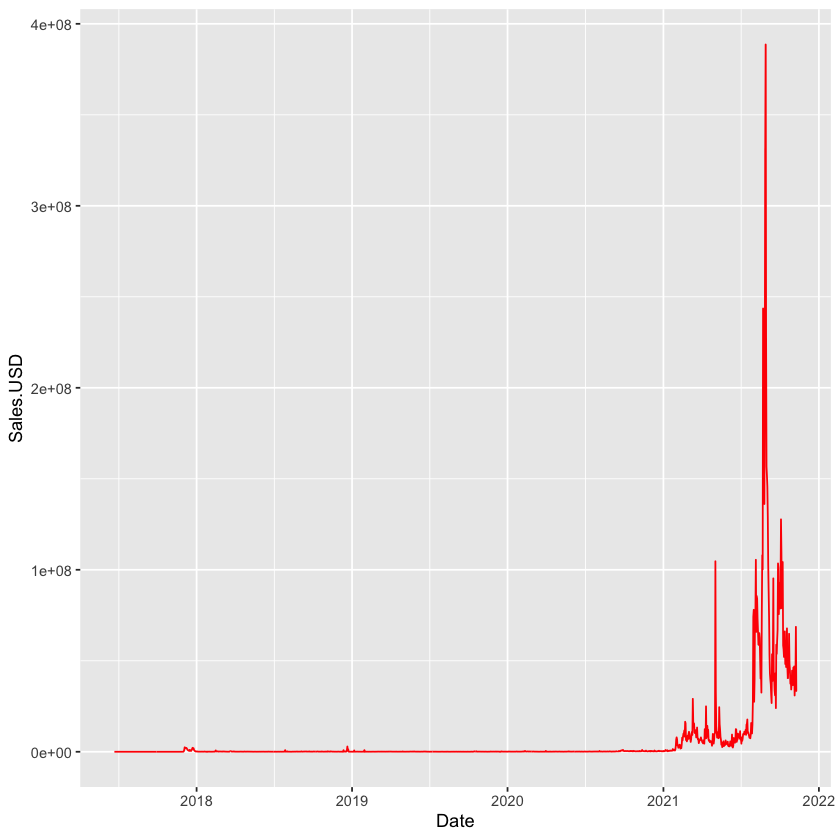

In [6]:
ggplot(data=NFT_price, aes(x=Date, y=Sales.USD)) + 
geom_line(color="red")

## 2 - ETH price

In [7]:
ETH_price <- read.csv('ETH-USD.csv') %>%
             mutate(Date = as.Date(Date)) %>%
             mutate(Open = as.numeric(Open)) %>%
             mutate(High = as.numeric(High)) %>%
             mutate(Low = as.numeric(Low)) %>%
             mutate(Close = as.numeric(Close)) %>%
             mutate(Adj.Close = as.numeric(Adj.Close)) %>%
             mutate(Volume = as.numeric(Volume))

head(ETH_price)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,7.98231,8.47123,7.98231,8.17257,8.17257,14731700
2,2017-01-02,8.17087,8.43633,8.05441,8.37851,8.37851,14579600
3,2017-01-03,8.37458,9.99680,8.31717,9.72525,9.72525,33625200
4,2017-01-04,9.70929,11.27640,9.55981,11.25160,11.25160,41051200
5,2017-01-05,11.28680,11.89090,9.40268,10.25440,10.25440,41557400
6,2017-01-06,10.28580,10.62920,9.62729,10.25470,10.25470,29471800


In [8]:
summary(ETH_price)

      Date                 Open               High               Low          
 Min.   :2017-01-01   Min.   :   7.982   Min.   :   8.436   Min.   :   7.982  
 1st Qu.:2018-03-20   1st Qu.: 174.849   1st Qu.: 179.692   1st Qu.: 170.717  
 Median :2019-06-07   Median : 283.808   Median : 293.506   Median : 273.421  
 Mean   :2019-06-07   Mean   : 698.300   Mean   : 724.513   Mean   : 670.221  
 3rd Qu.:2020-08-24   3rd Qu.: 639.466   3rd Qu.: 662.820   3rd Qu.: 602.271  
 Max.   :2021-11-11   Max.   :4810.071   Max.   :4859.503   Max.   :4718.039  
                      NA's   :4          NA's   :4          NA's   :4         
     Close            Adj.Close            Volume         
 Min.   :   8.173   Min.   :   8.173   Min.   :4.690e+06  
 1st Qu.: 174.868   1st Qu.: 174.868   1st Qu.:1.631e+09  
 Median : 284.161   Median : 284.161   Median :6.450e+09  
 Mean   : 700.929   Mean   : 700.929   Mean   :1.002e+10  
 3rd Qu.: 642.628   3rd Qu.: 642.628   3rd Qu.:1.480e+10  
 Max.   :4812.

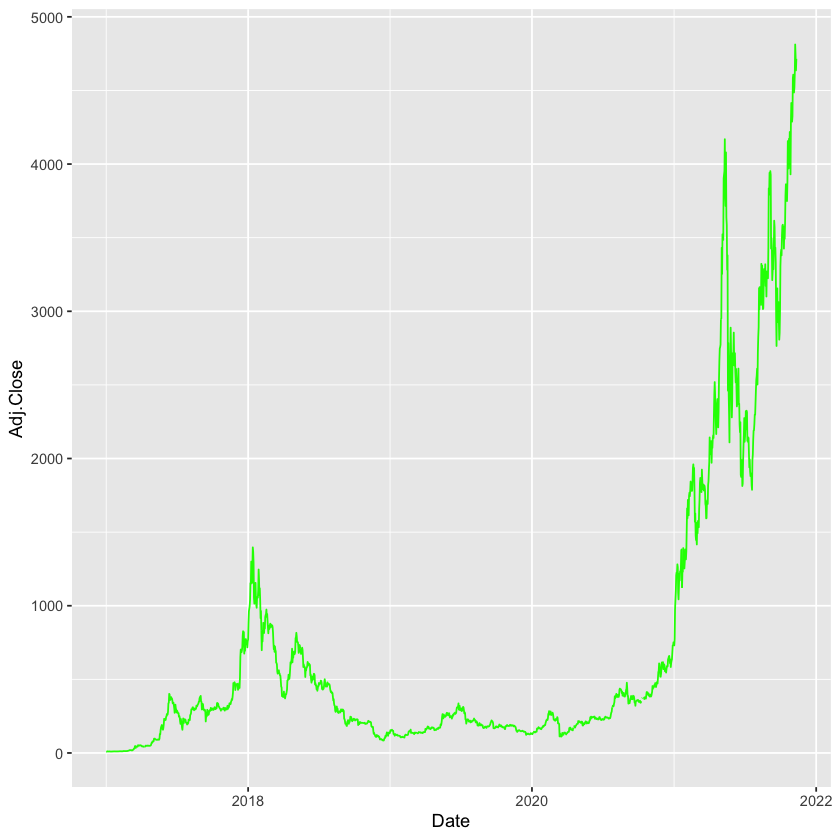

In [9]:
ggplot(data=ETH_price, aes(x=Date, y=Adj.Close)) + 
geom_line(color="green")

## 3 - Tweet volume

In [7]:
library(httr)
library(jsonlite)


Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




**Querying the API gives 30 results per page**

In [8]:
#Bearer token is Private - Needs access granted to Twitter API. Replace below string with your unique Bearer_token to get data. 
bearer_token = "AAAAAAAAAAAAAAAAAAAAACzyVAEAAAAAMZnwRwus1XDVUlJfRE9TiN4uAok%3DMB6ISFHyBDbsSVMc83n1CItN27fODII0OekQMKAkkR1RVY3RrY"
headers = c(
  `Authorization` = sprintf('Bearer %s', bearer_token)
)

params = list(
  `query` = 'NFT',
  `granularity` = 'day',
  `start_time` = '2017-06-22T00:00:00.00Z',
  `end_time` = '2021-11-10T00:00:00.00Z'
 
)

response <- GET(url = 'https://api.twitter.com/2/tweets/counts/all', add_headers(.headers=headers), query = params)

body <-
  content(
    response,
    as = 'parsed',
    type = 'application/json',
    simplifyDataFrame = TRUE
  )

View(body$data)

,end,start,tweet_count
,<chr>,<chr>,<int>
1,2021-10-11T00:00:00.000Z,2021-10-10T00:00:00.000Z,800998
2,2021-10-12T00:00:00.000Z,2021-10-11T00:00:00.000Z,873353
3,2021-10-13T00:00:00.000Z,2021-10-12T00:00:00.000Z,844249
4,2021-10-14T00:00:00.000Z,2021-10-13T00:00:00.000Z,877672
5,2021-10-15T00:00:00.000Z,2021-10-14T00:00:00.000Z,909628
6,2021-10-16T00:00:00.000Z,2021-10-15T00:00:00.000Z,870713
7,2021-10-17T00:00:00.000Z,2021-10-16T00:00:00.000Z,873272
8,2021-10-18T00:00:00.000Z,2021-10-17T00:00:00.000Z,859533
9,2021-10-19T00:00:00.000Z,2021-10-18T00:00:00.000Z,857402


**Comments**: Looping while the next_token is non-null to retrieve all tweet volume data, the complete dataset is stored in data_new. Note that when the cell ends with a "argument is of length zero" error message once next_token is NA, the complete dataset is nontheless stored in data_new.

In [9]:
data <- body$data
data_new <- data

next_token <- body$meta$next_token

while(!is.na(next_token)){
    params$next_token <- next_token
    response_new <- GET(url = 'https://api.twitter.com/2/tweets/counts/all', add_headers(.headers=headers), query = params)
    body_new <- content(
        response_new,
        as = 'parsed',
        type = 'application/json',
        simplifyDataFrame = TRUE
    )
    
    #print(body_new$data)
    data_new <- rbind(data_new, body_new$data) #Aggreagated dataset
    
    next_token <- body_new$meta$next_token
    
}

ERROR: Error in while (!is.na(next_token)) {: argument is of length zero


In [17]:
head(data_new)

,end,start,tweet_count
,<chr>,<chr>,<int>
1,2021-10-11T00:00:00.000Z,2021-10-10T00:00:00.000Z,899592
2,2021-10-12T00:00:00.000Z,2021-10-11T00:00:00.000Z,963390
3,2021-10-13T00:00:00.000Z,2021-10-12T00:00:00.000Z,949116
4,2021-10-14T00:00:00.000Z,2021-10-13T00:00:00.000Z,1001998
5,2021-10-15T00:00:00.000Z,2021-10-14T00:00:00.000Z,1025964
6,2021-10-16T00:00:00.000Z,2021-10-15T00:00:00.000Z,986516


In [18]:
#Use the 'start' column to identify the date
data_new <- data_new %>%
            mutate(end=as.Date(end)) %>%
            mutate(start=as.Date(start)) %>%
            dplyr::select(start, tweet_count) 

head(data_new)

,start,tweet_count
,<date>,<int>
1,2021-10-10,899592
2,2021-10-11,963390
3,2021-10-12,949116
4,2021-10-13,1001998
5,2021-10-14,1025964
6,2021-10-15,986516


## Joined dataframe: Date, Tweet volume and ETH price

In [19]:
ETH_AdjClose <- ETH_price %>%
                dplyr::select(Date, Adj.Close)

head(ETH_AdjClose)

,Date,Adj.Close
,<date>,<dbl>
1,2017-01-01,8.17257
2,2017-01-02,8.37851
3,2017-01-03,9.72525
4,2017-01-04,11.25160
5,2017-01-05,10.25440
6,2017-01-06,10.25470


In [20]:
joined_data <- data_new %>%
               inner_join(NFT_price, by=c("start"="Date")) %>%
               inner_join(ETH_AdjClose, by=c("start"="Date")) %>%
               distinct(start, .keep_all = TRUE) %>%
               arrange(start) %>%
               rename(Date = start) %>%
               rename(NFTSales_USD = Sales.USD) %>%
               rename(Tweet_count = tweet_count) %>%
               rename(ETH_USD = Adj.Close) %>%
               drop_na()

In [21]:
head(joined_data)

,Date,Tweet_count,NFTSales_USD,ETH_USD
,<date>,<int>,<dbl>,<dbl>
1,2017-06-22,45,0.00,336.371
2,2017-06-23,173,1020.30,341.739
3,2017-06-24,53,1240.84,323.696
4,2017-06-25,47,517.55,303.248
5,2017-06-26,70,424.63,272.692
6,2017-06-27,36,2092.91,293.088


### Create three dataframes: 

- **joined_data.2020**: Joined dataframe, observations starting January 1st 2020
- **joined_data.2020.log**: Log-transformed joined dataframe, observations starting January 1st 2020
- **joined_data.2020.log.diff**: Log-transformed joined dataframe, oobservations starting January 1st 2020, with lagged variables and 1st order differencing to be used in the third linear model. Drop the fist row giving an NA due to the differencing.


In [22]:

joined_data.2020 <- joined_data %>%
                    filter(Date>="2020-01-01")

joined_data.2020.log <- joined_data.2020 %>%
                        mutate(NFTSales_USD = log(NFTSales_USD)) %>%
                        mutate(Tweet_count = log(Tweet_count)) %>%
                        mutate(ETH_USD = log(ETH_USD))

joined_data.2020.log.diff <- joined_data.2020.log %>%
                             mutate(Date_YrMonth = strftime(Date, format = "%Y-%m")) %>%
                             mutate(Tweet_count.lag = lag(Tweet_count)) %>%
                             mutate(Tweet_count.diff = Tweet_count - Tweet_count.lag) %>%
                             mutate(NFTSales_USD.lag = lag(NFTSales_USD)) %>%
                             mutate(NFTSales_USD.diff = NFTSales_USD - NFTSales_USD.lag) %>%
                             mutate(ETH_USD.lag = lag(ETH_USD)) %>%
                             mutate(ETH_USD.diff = ETH_USD - ETH_USD.lag) %>%
                             drop_na()


In [23]:
head(joined_data.2020.log.diff)

,Date,Tweet_count,NFTSales_USD,ETH_USD,Date_YrMonth,Tweet_count.lag,Tweet_count.diff,NFTSales_USD.lag,NFTSales_USD.diff,ETH_USD.lag,ETH_USD.diff
,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,6.135565,11.13270,4.847412,2020-01,6.030685,0.10487963,11.02633,0.10637285,4.873685,-0.026273107
2,2020-01-03,6.070738,11.39659,4.899120,2020-01,6.135565,-0.06482716,11.13270,0.26388527,4.847412,0.051708737
3,2020-01-04,5.802118,11.84623,4.905788,2020-01,6.070738,-0.26861935,11.39659,0.44964142,4.899120,0.006668094
4,2020-01-05,5.774552,11.22120,4.914688,2020-01,5.802118,-0.02756683,11.84623,-0.62502802,4.905788,0.008899489
5,2020-01-06,5.953243,11.60638,4.971923,2020-01,5.774552,0.17869179,11.22120,0.38517682,4.914688,0.057235288
6,2020-01-07,6.089045,11.55181,4.966642,2020-01,5.953243,0.13580154,11.60638,-0.05457093,4.971923,-0.005281700


In [24]:
summary(joined_data.2020.log.diff)

      Date             Tweet_count      NFTSales_USD      ETH_USD     
 Min.   :2020-01-02   Min.   : 5.775   Min.   :10.50   Min.   :4.706  
 1st Qu.:2020-06-20   1st Qu.: 7.356   1st Qu.:11.65   1st Qu.:5.486  
 Median :2020-12-08   Median : 9.282   Median :12.97   Median :6.380  
 Mean   :2020-12-06   Mean   : 9.740   Mean   :13.90   Mean   :6.626  
 3rd Qu.:2021-05-25   3rd Qu.:12.024   3rd Qu.:16.00   3rd Qu.:7.739  
 Max.   :2021-11-09   Max.   :14.073   Max.   :19.78   Max.   :8.479  
 Date_YrMonth       Tweet_count.lag  Tweet_count.diff     NFTSales_USD.lag
 Length:673         Min.   : 5.775   Min.   :-0.8953840   Min.   :10.50   
 Class :character   1st Qu.: 7.346   1st Qu.:-0.1061252   1st Qu.:11.64   
 Mode  :character   Median : 9.278   Median :-0.0005518   Median :12.96   
                    Mean   : 9.728   Mean   : 0.0118022   Mean   :13.89   
                    3rd Qu.:12.021   3rd Qu.: 0.1255455   3rd Qu.:15.99   
                    Max.   :14.073   Max.   : 1.08728

# Exploratory Data Analysis

## Log transforming

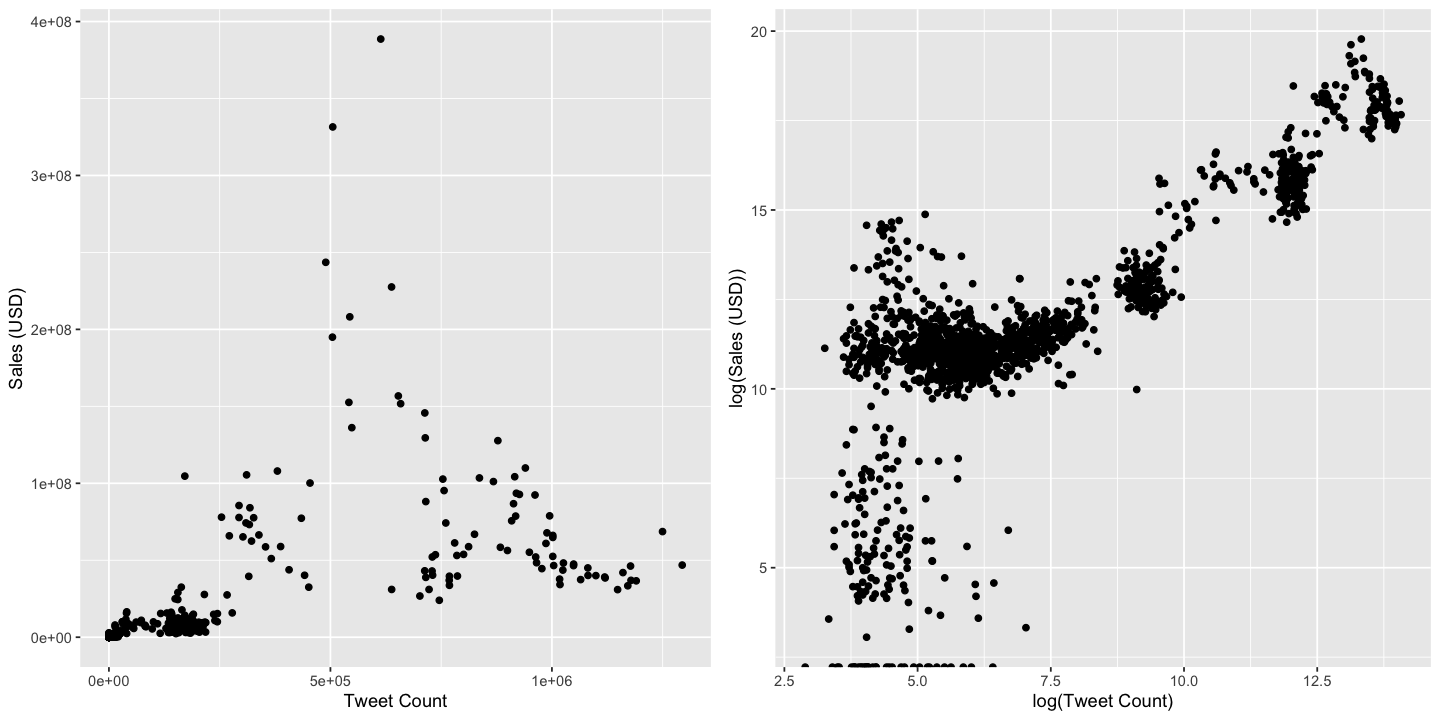

In [25]:
fig(12,6)

p1 <- ggplot(joined_data) + 
      geom_point(aes(Tweet_count, NFTSales_USD)) +
      labs(x="Tweet Count", y="Sales (USD)")

p2 <- ggplot(joined_data) + 
      geom_point(aes(log(Tweet_count), log(NFTSales_USD))) +
      labs(x="log(Tweet Count)", y="log(Sales (USD))")

grid.arrange(p1, p2, nrow=1)

### Distribution Impact

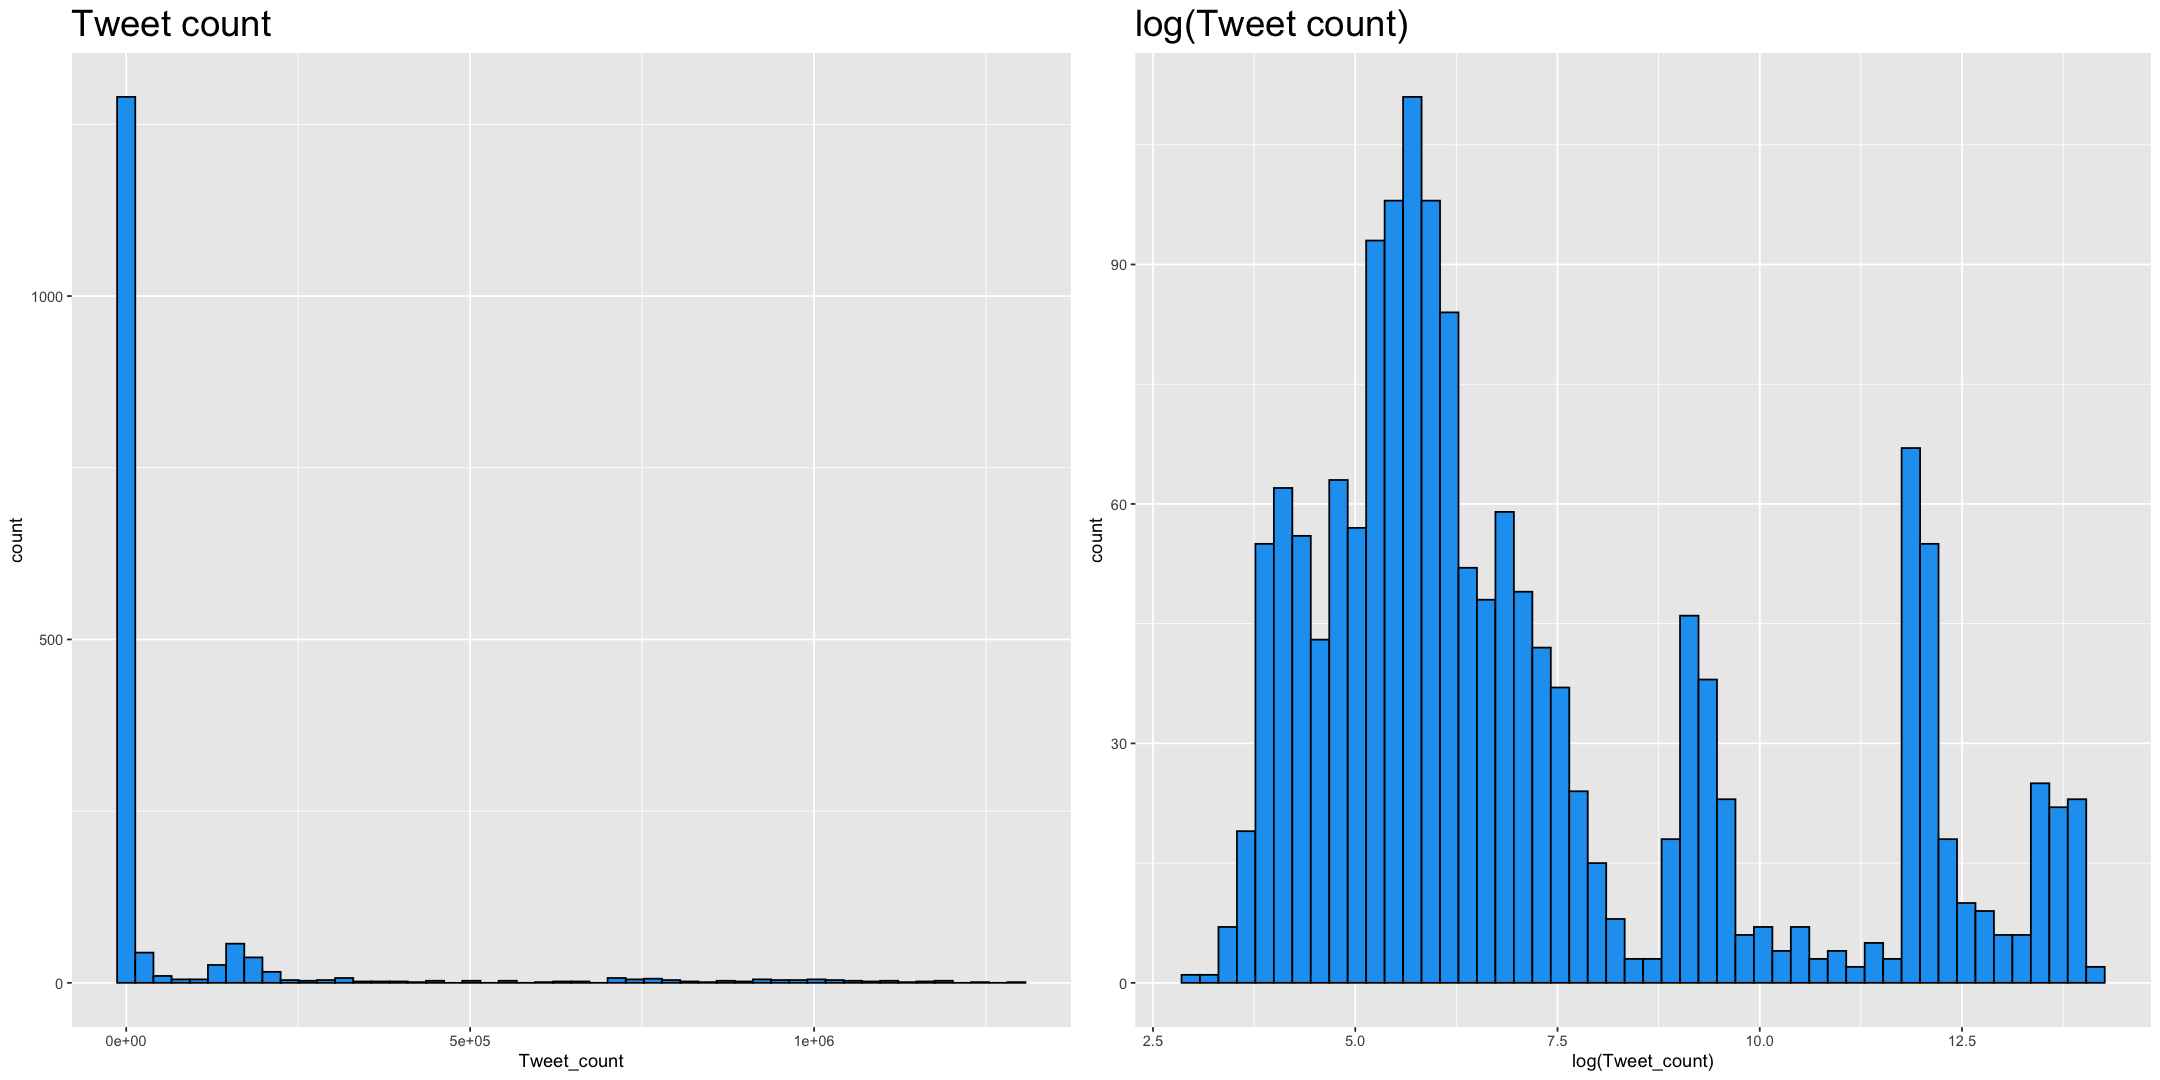

In [26]:
fig(18,9)

p1 <- joined_data %>% ggplot() +
      geom_histogram(aes(Tweet_count), fill="#1DA1F2", color="#000000", bins=50) +
      labs(title="Tweet count") +
      theme(plot.title = element_text(size=22))

p2 <- joined_data %>% ggplot() +
      geom_histogram(aes(log(Tweet_count)), fill="#1DA1F2", color="#000000", bins=50) +
      labs(title="log(Tweet count)") + 
      theme(plot.title = element_text(size=22))

grid.arrange(p1, p2, nrow=1)

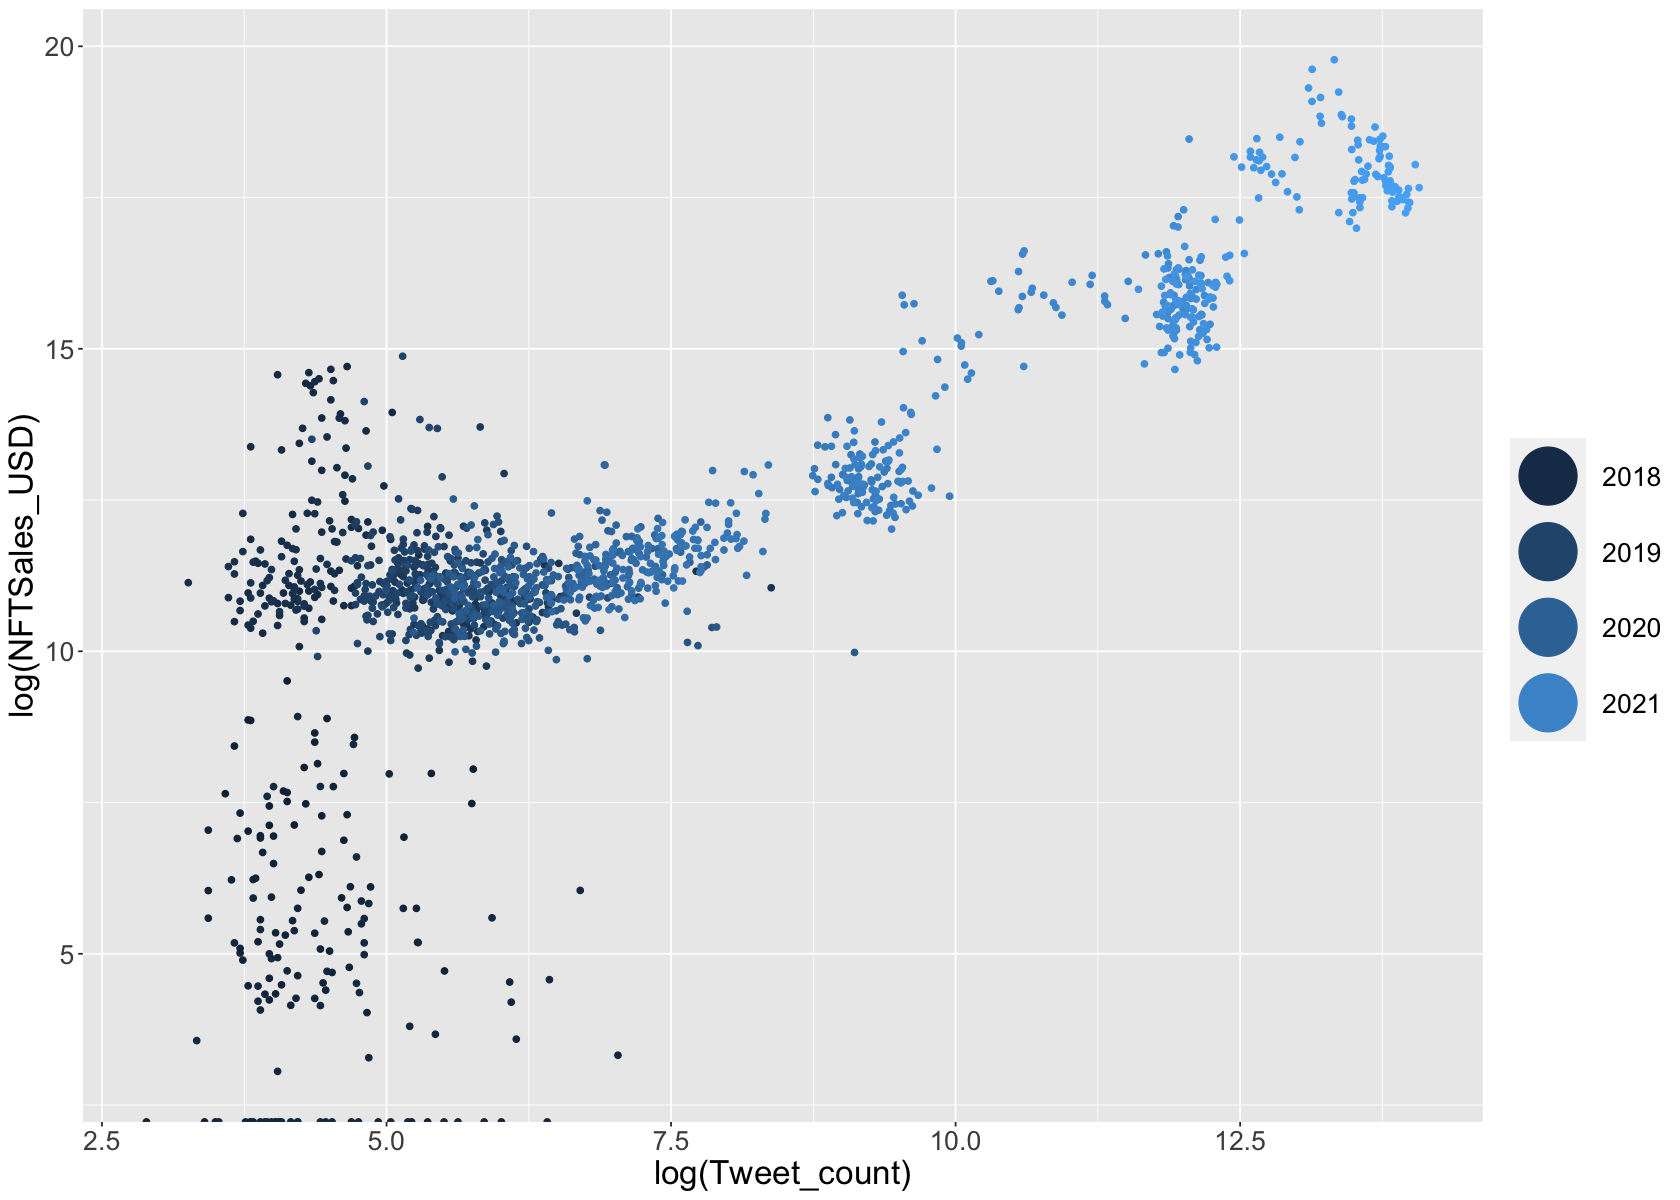

In [27]:
fig(14,10)

ggplot(joined_data) +
geom_point(aes(log(Tweet_count), log(NFTSales_USD), color=Date)) + 
theme(text=element_text(size=20)) +#legend.text=element_text(size=14), ) +
guides(colour = guide_legend(override.aes = list(size=16), order=2)) + labs(color="")

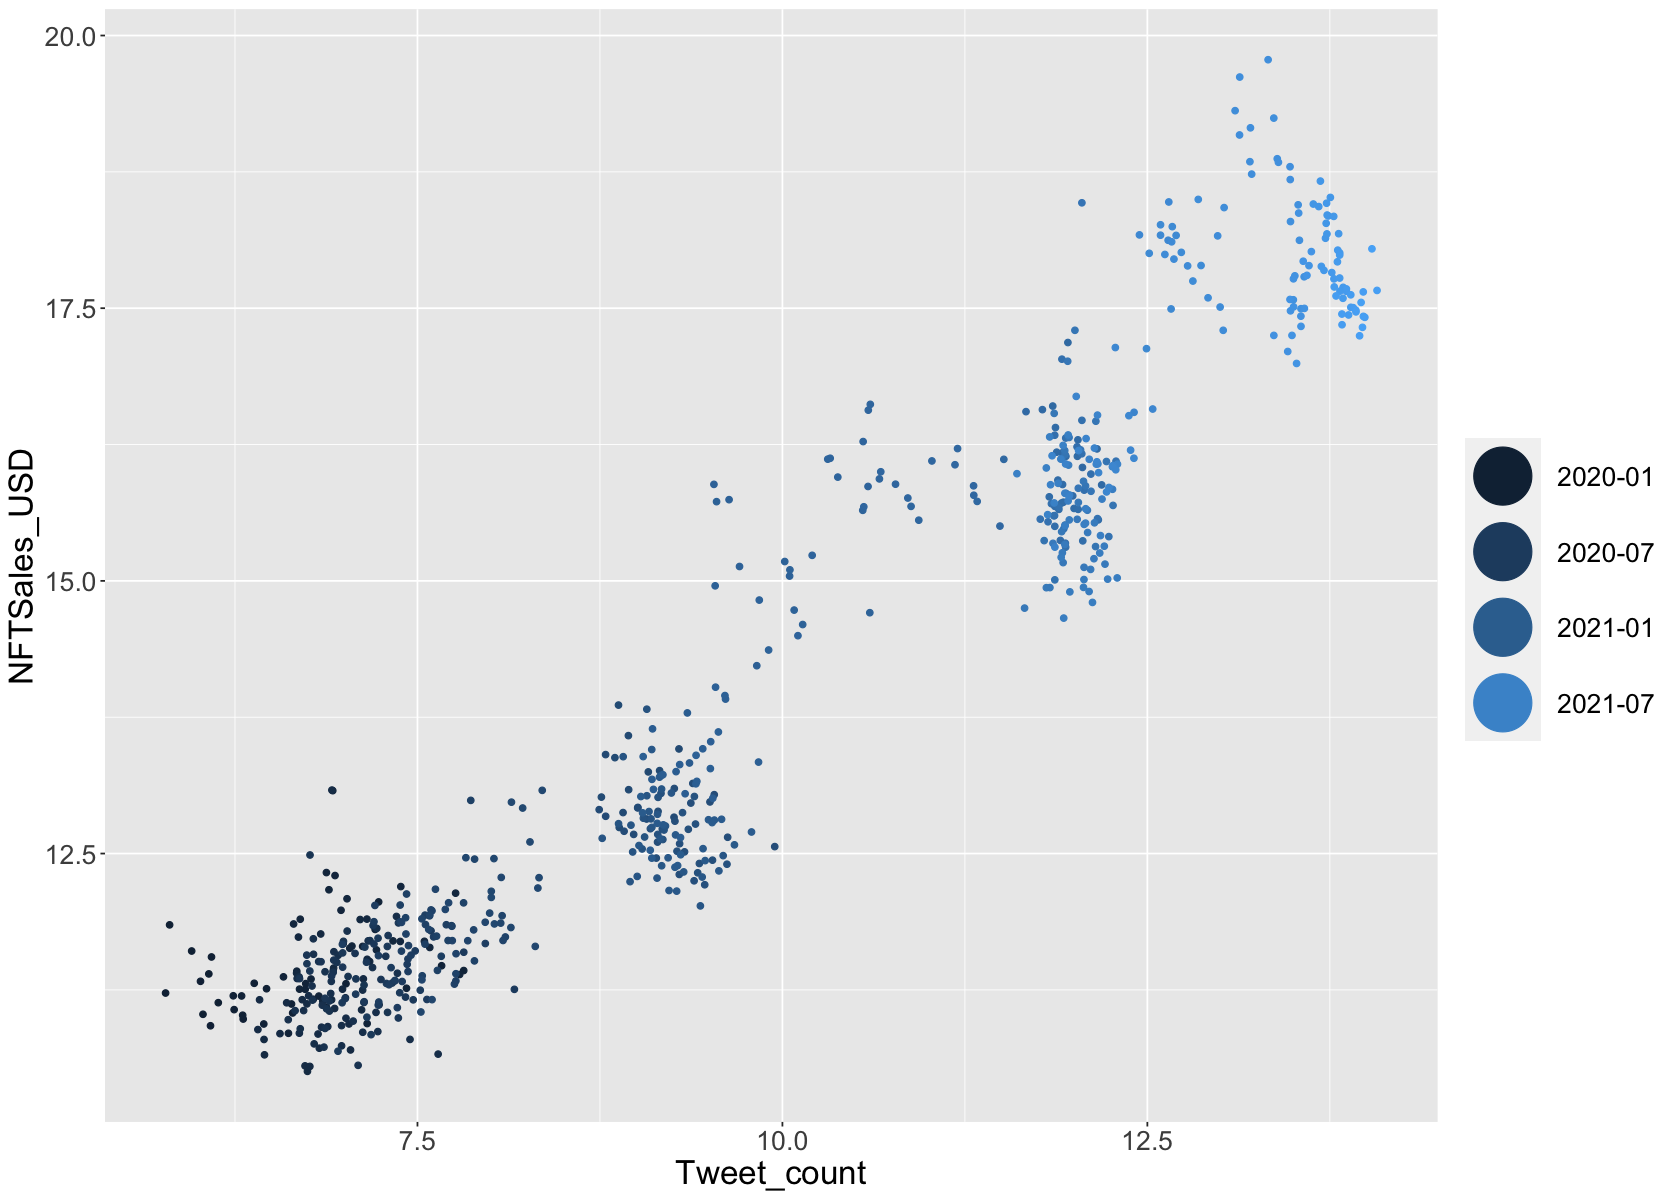

In [28]:
fig(14,10)

ggplot(joined_data.2020.log) +
geom_point(aes(Tweet_count, NFTSales_USD, color=Date)) + 
theme(text=element_text(size=20)) +#legend.text=element_text(size=14), ) +
guides(colour = guide_legend(override.aes = list(size=16), order=2)) + labs(color="")

##  Assessing the risk of spurious regression

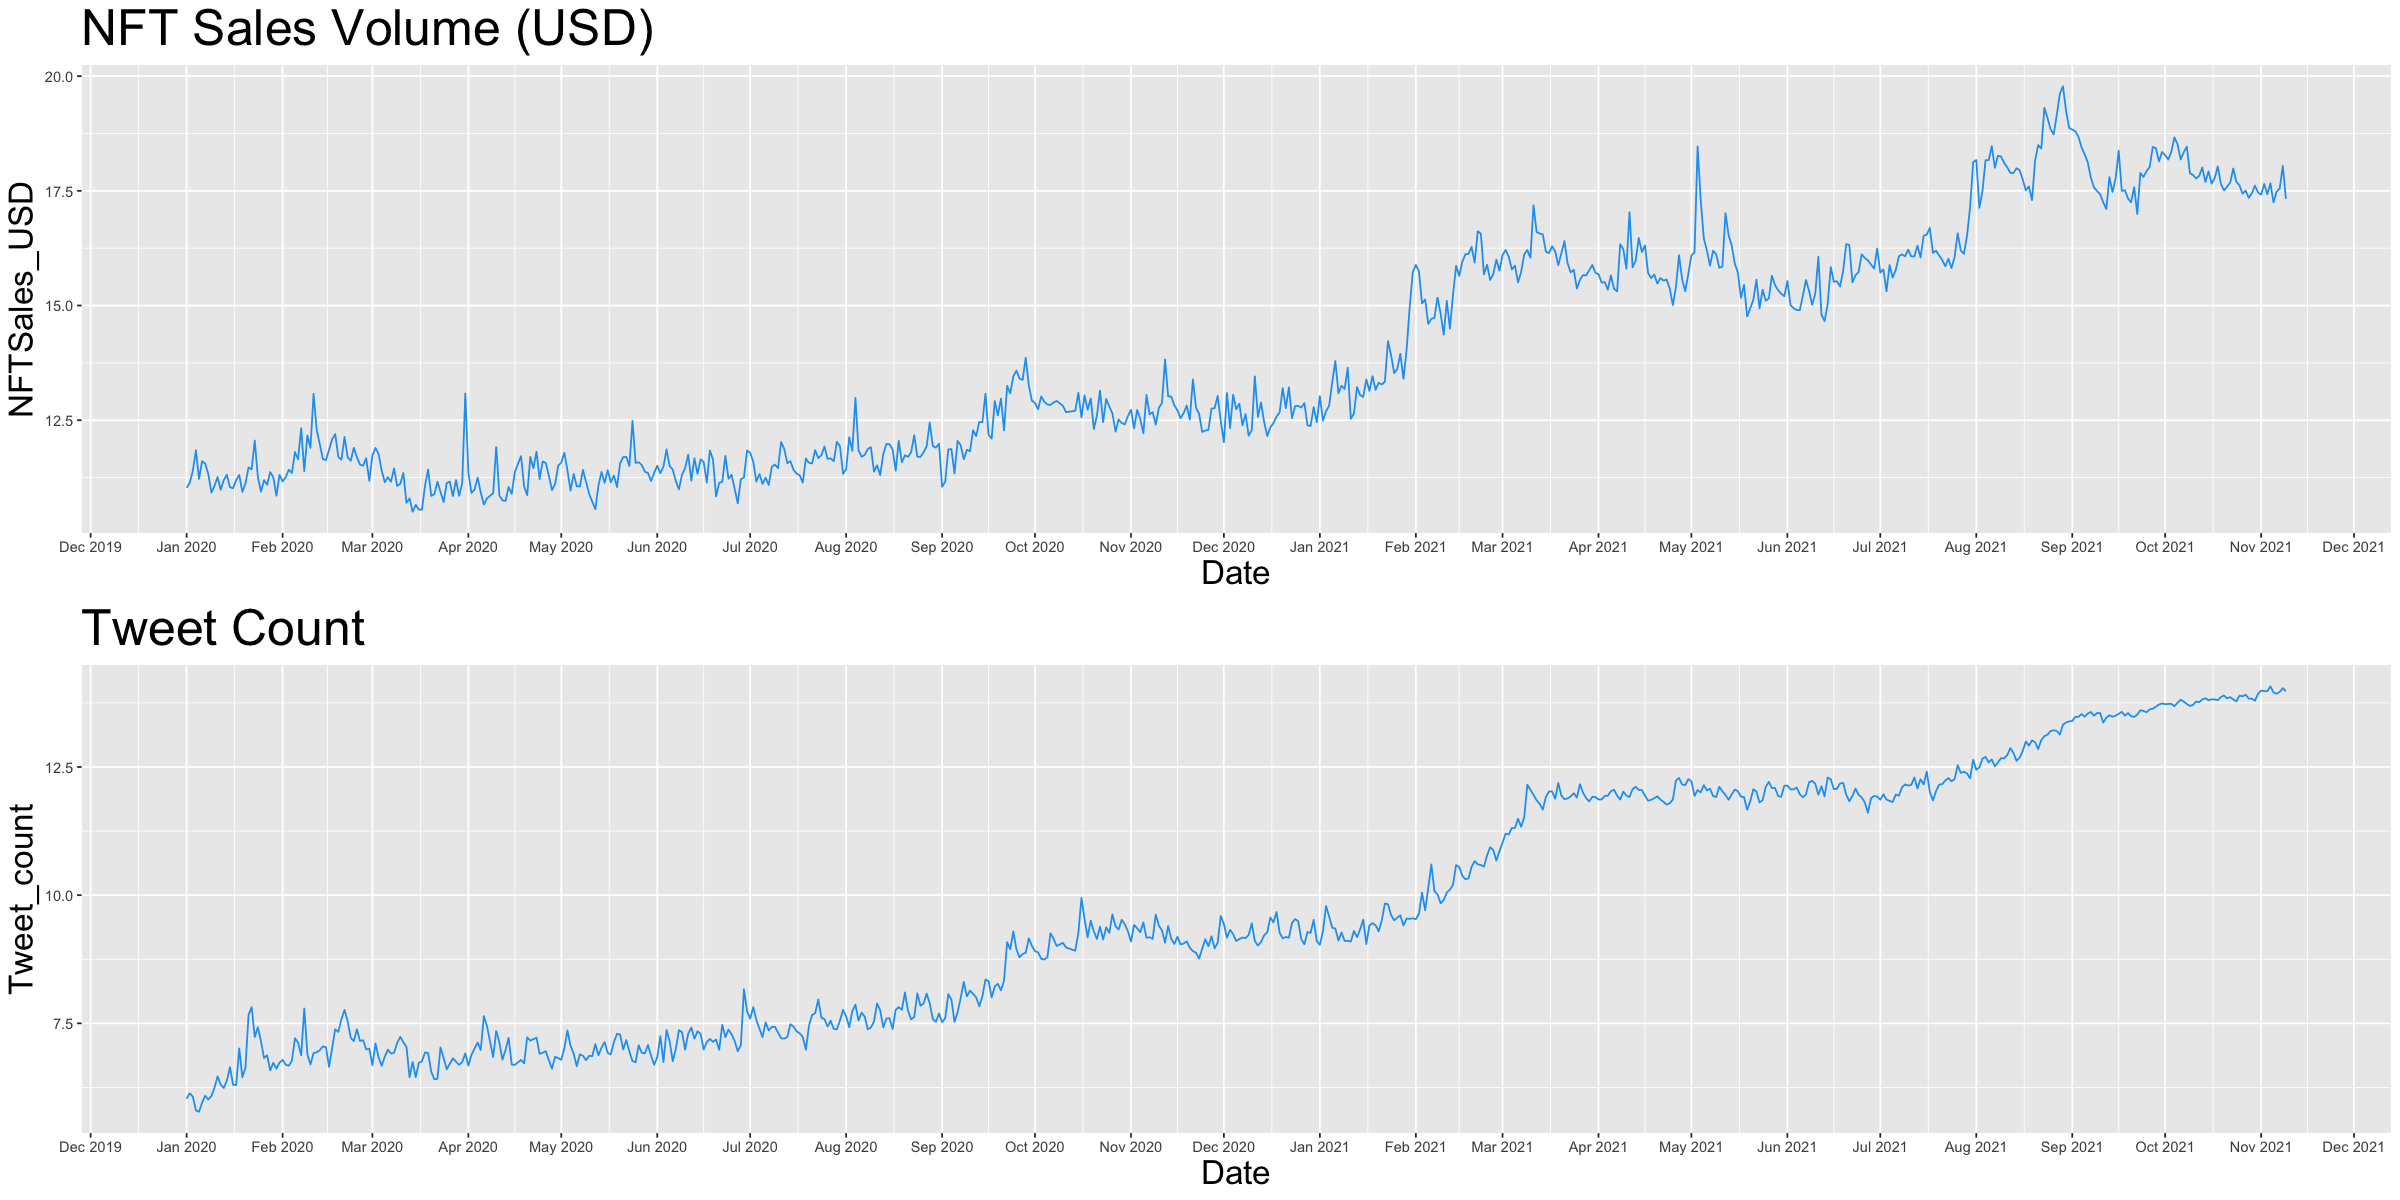

In [29]:
fig(20,10)

p1 <- joined_data.2020.log %>% ggplot() +
      geom_line(aes(x=Date, y=NFTSales_USD), color="#1DA1F2") +
      scale_x_date(date_breaks="1 month", date_labels="%b %Y") +
      labs(title="NFT Sales Volume (USD)") +
      theme(plot.title = element_text(size=30), axis.title=element_text(size=20))

p2 <- joined_data.2020.log %>% ggplot() +
      geom_line(aes(x=Date, y=Tweet_count), color="#1DA1F2") +
      scale_x_date(date_breaks="1 month", date_labels="%b %Y") +
      labs(title="Tweet Count") + 
      theme(plot.title = element_text(size=30), axis.title=element_text(size=20))

grid.arrange(p1, p2, ncol=1)

# Linear models

We here transform the columns from our joined dataframe into time series objects in order to use the tslm() function to build our three linear models

In [30]:
library(lmtest)
library(ggfortify)
library(tseries)

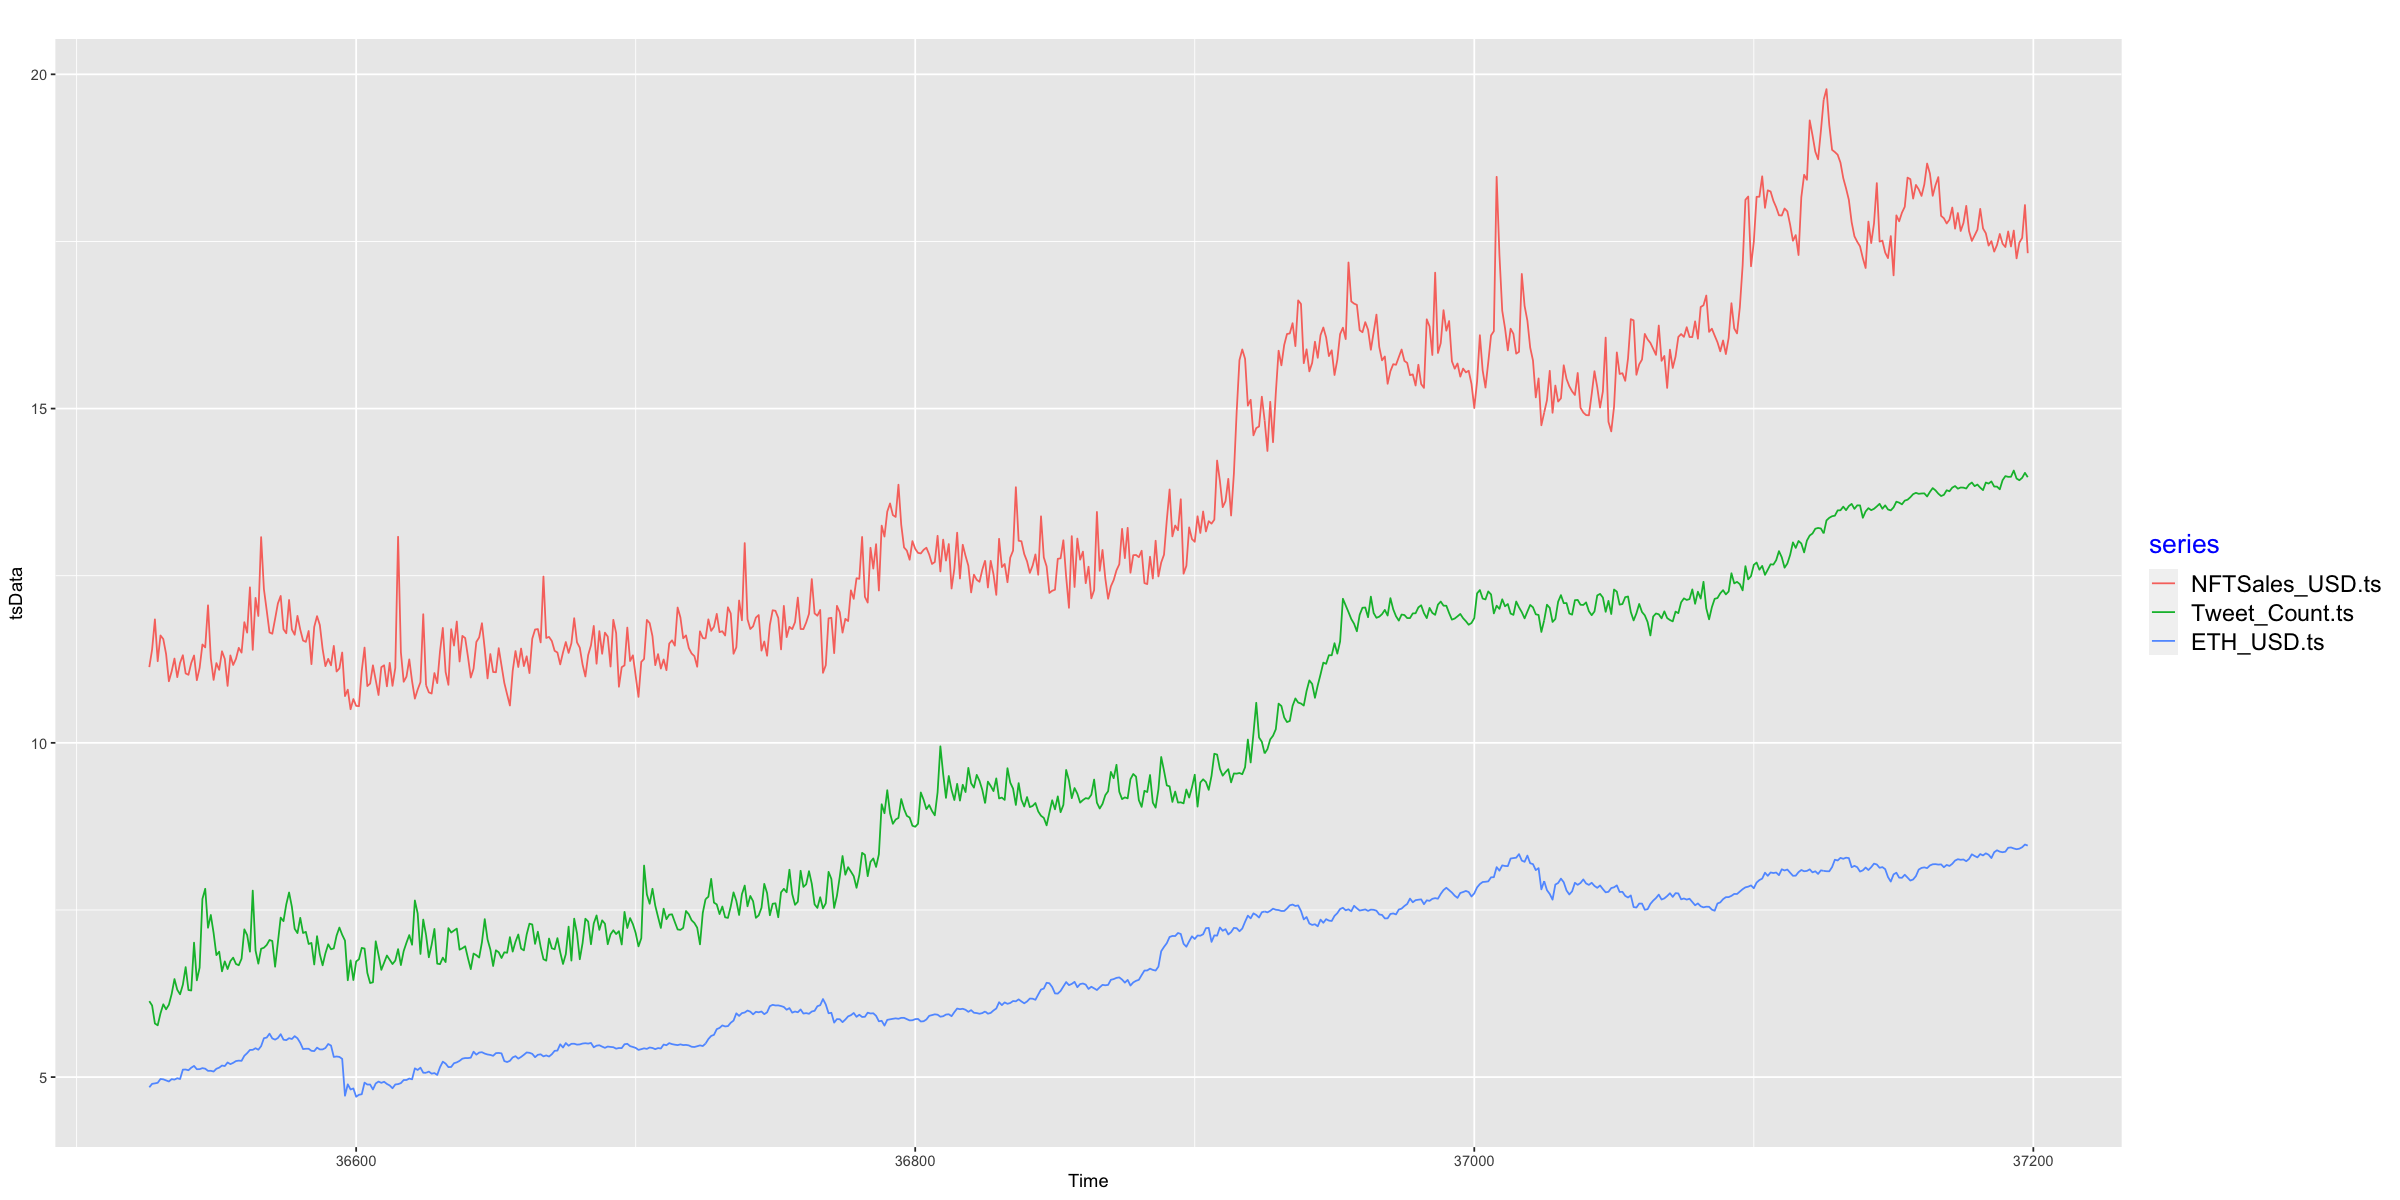

In [31]:
NFTSales_USD.ts <- ts(joined_data.2020.log.diff$NFTSales_USD, joined_data.2020.log.diff$Date)
NFTSales_USD_lag <- ts(joined_data.2020.log.diff$NFTSales_USD.lag, joined_data.2020.log.diff$Date)
NFTSales_USD_diff <- ts(joined_data.2020.log.diff$NFTSales_USD.diff, joined_data.2020.log.diff$Date)
Tweet_Count.ts <- ts(joined_data.2020.log.diff$Tweet_count, joined_data.2020.log.diff$Date)
Tweet_Count_diff <- ts(joined_data.2020.log.diff$Tweet_count.diff, joined_data.2020.log.diff$Date)
ETH_USD.ts <- ts(joined_data.2020.log.diff$ETH_USD, joined_data.2020.log.diff$Date)

tsData <- cbind(NFTSales_USD.ts, Tweet_Count.ts, ETH_USD.ts)#, NFTSales_USD_lag, NFTSales_USD_diff)

autoplot(tsData) + theme(legend.title = element_text(color = "blue", size = 16), legend.text = element_text( size = 14))


In [32]:
model1 <- tslm(formula=NFTSales_USD.ts ~ trend + Tweet_Count.ts, data=tsData)
summary(model1)


Call:
tslm(formula = NFTSales_USD.ts ~ trend + Tweet_Count.ts, data = tsData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61676 -0.44664 -0.05622  0.34635  2.40407 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.9100049  0.2763996  14.146   <2e-16 ***
trend          -0.0011293  0.0006111  -1.848   0.0651 .  
Tweet_Count.ts  1.0647178  0.0484593  21.971   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.689 on 670 degrees of freedom
Multiple R-squared:  0.9239,	Adjusted R-squared:  0.9237 
F-statistic:  4068 on 2 and 670 DF,  p-value: < 2.2e-16


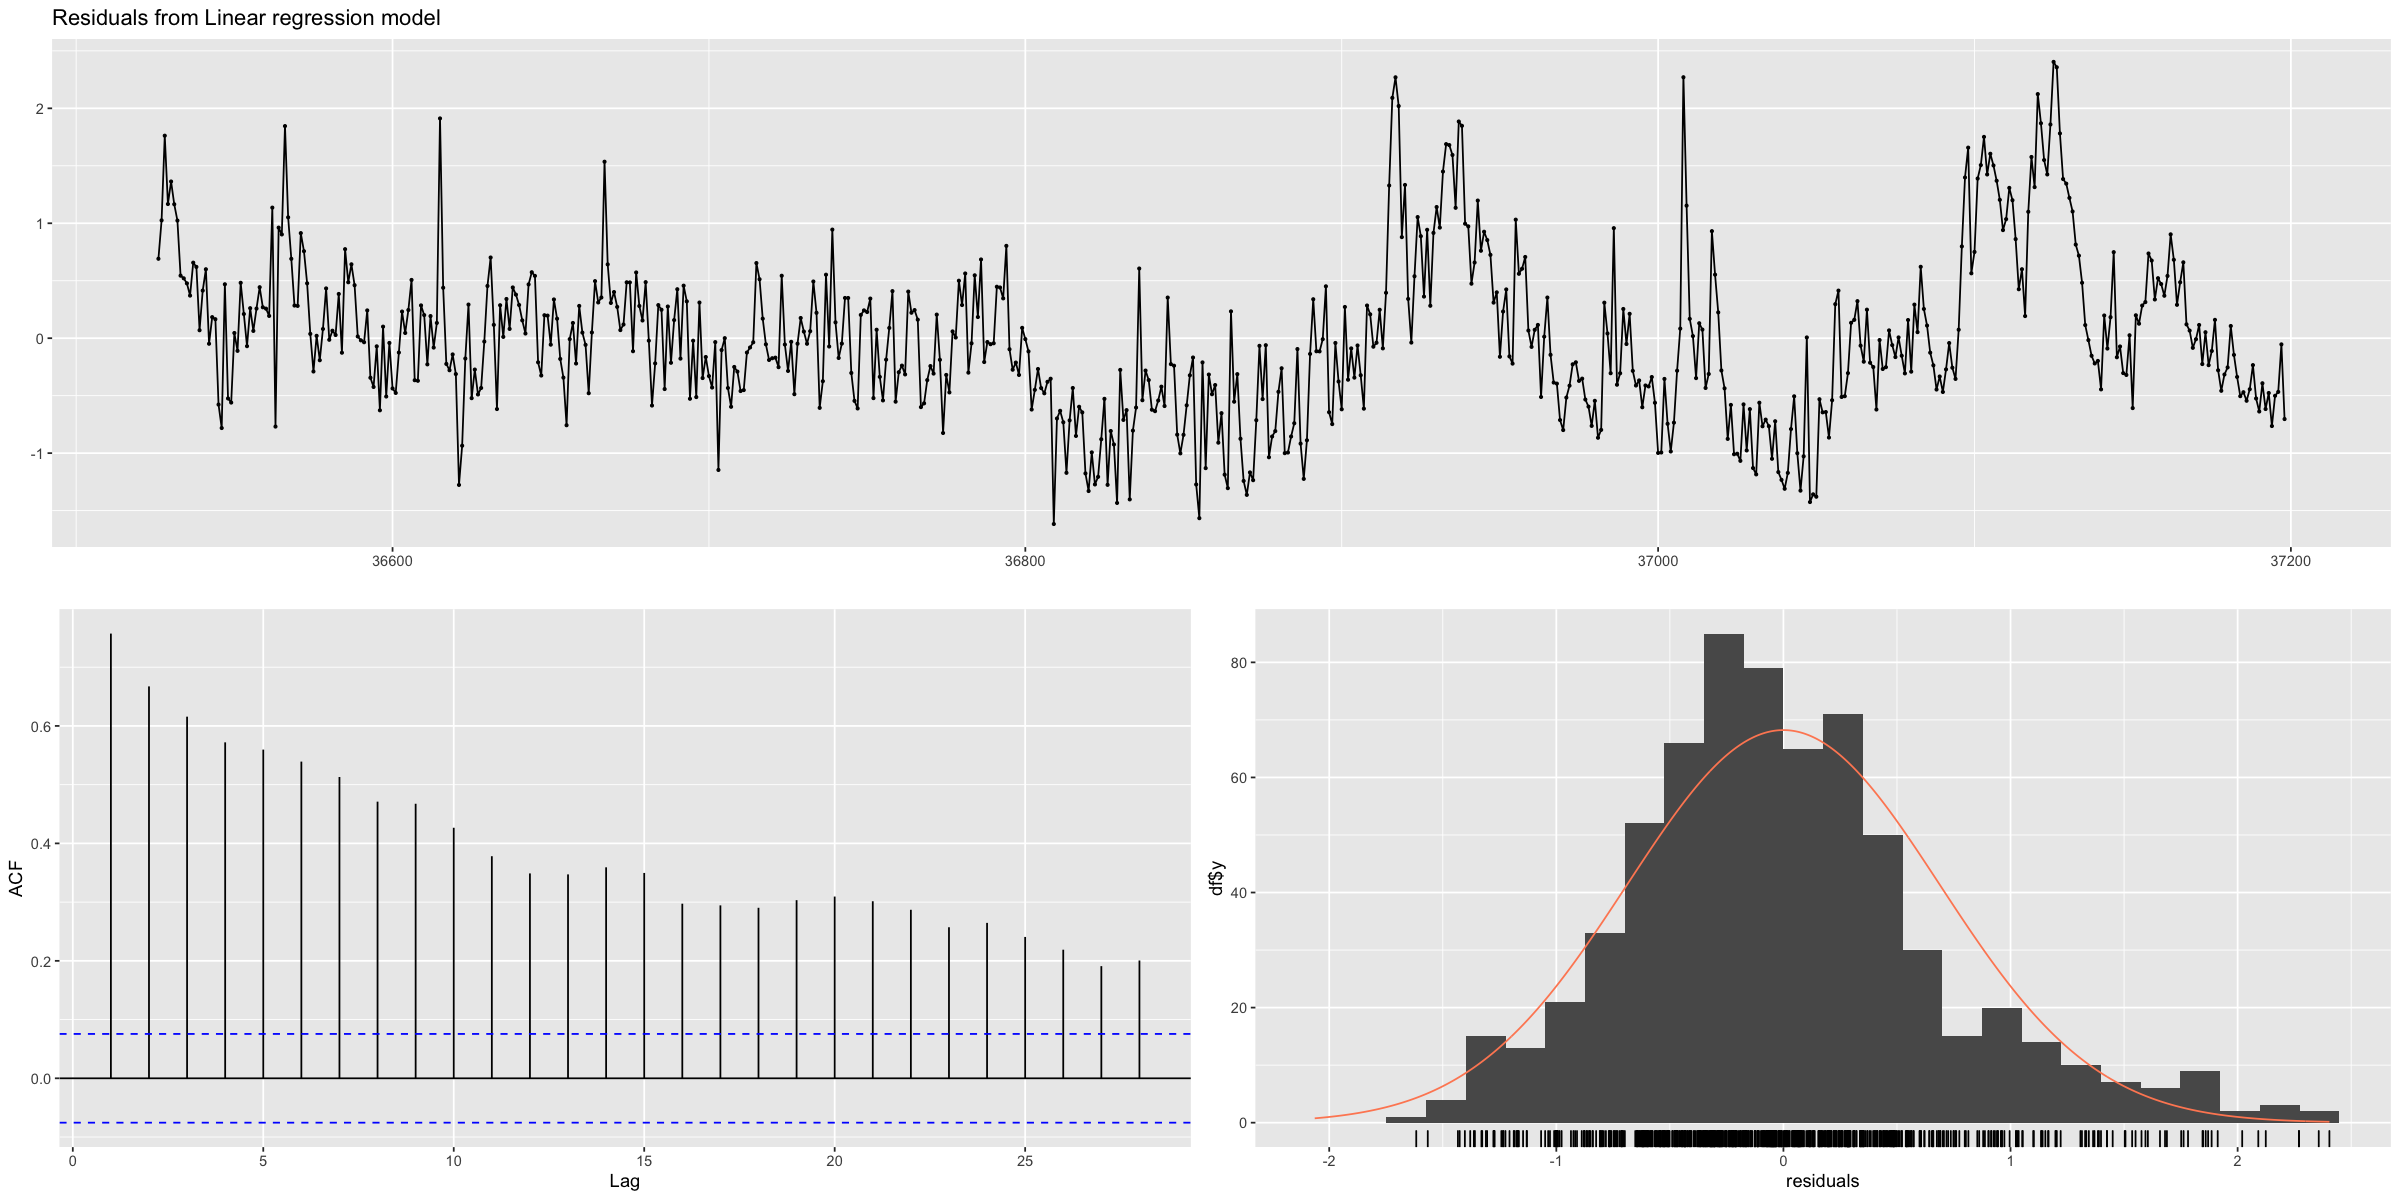

In [33]:
checkresiduals(model1, test=FALSE)

In [34]:
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 23.703, df = 2, p-value = 7.127e-06


In [35]:
dwtest(model1)


	Durbin-Watson test

data:  model1
DW = 0.48247, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [36]:
model2 <- tslm(formula=NFTSales_USD.ts ~ trend + Tweet_Count.ts + ETH_USD.ts, data=tsData)
summary(model2)


Call:
tslm(formula = NFTSales_USD.ts ~ trend + Tweet_Count.ts + ETH_USD.ts, 
    data = tsData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46712 -0.40938 -0.04772  0.35950  2.46234 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.5770707  0.4197301   3.757 0.000187 ***
trend          -0.0030852  0.0006489  -4.754 2.44e-06 ***
Tweet_Count.ts  0.9023342  0.0518883  17.390  < 2e-16 ***
ETH_USD.ts      0.6902887  0.0959503   7.194 1.69e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6643 on 669 degrees of freedom
Multiple R-squared:  0.9294,	Adjusted R-squared:  0.9291 
F-statistic:  2935 on 3 and 669 DF,  p-value: < 2.2e-16


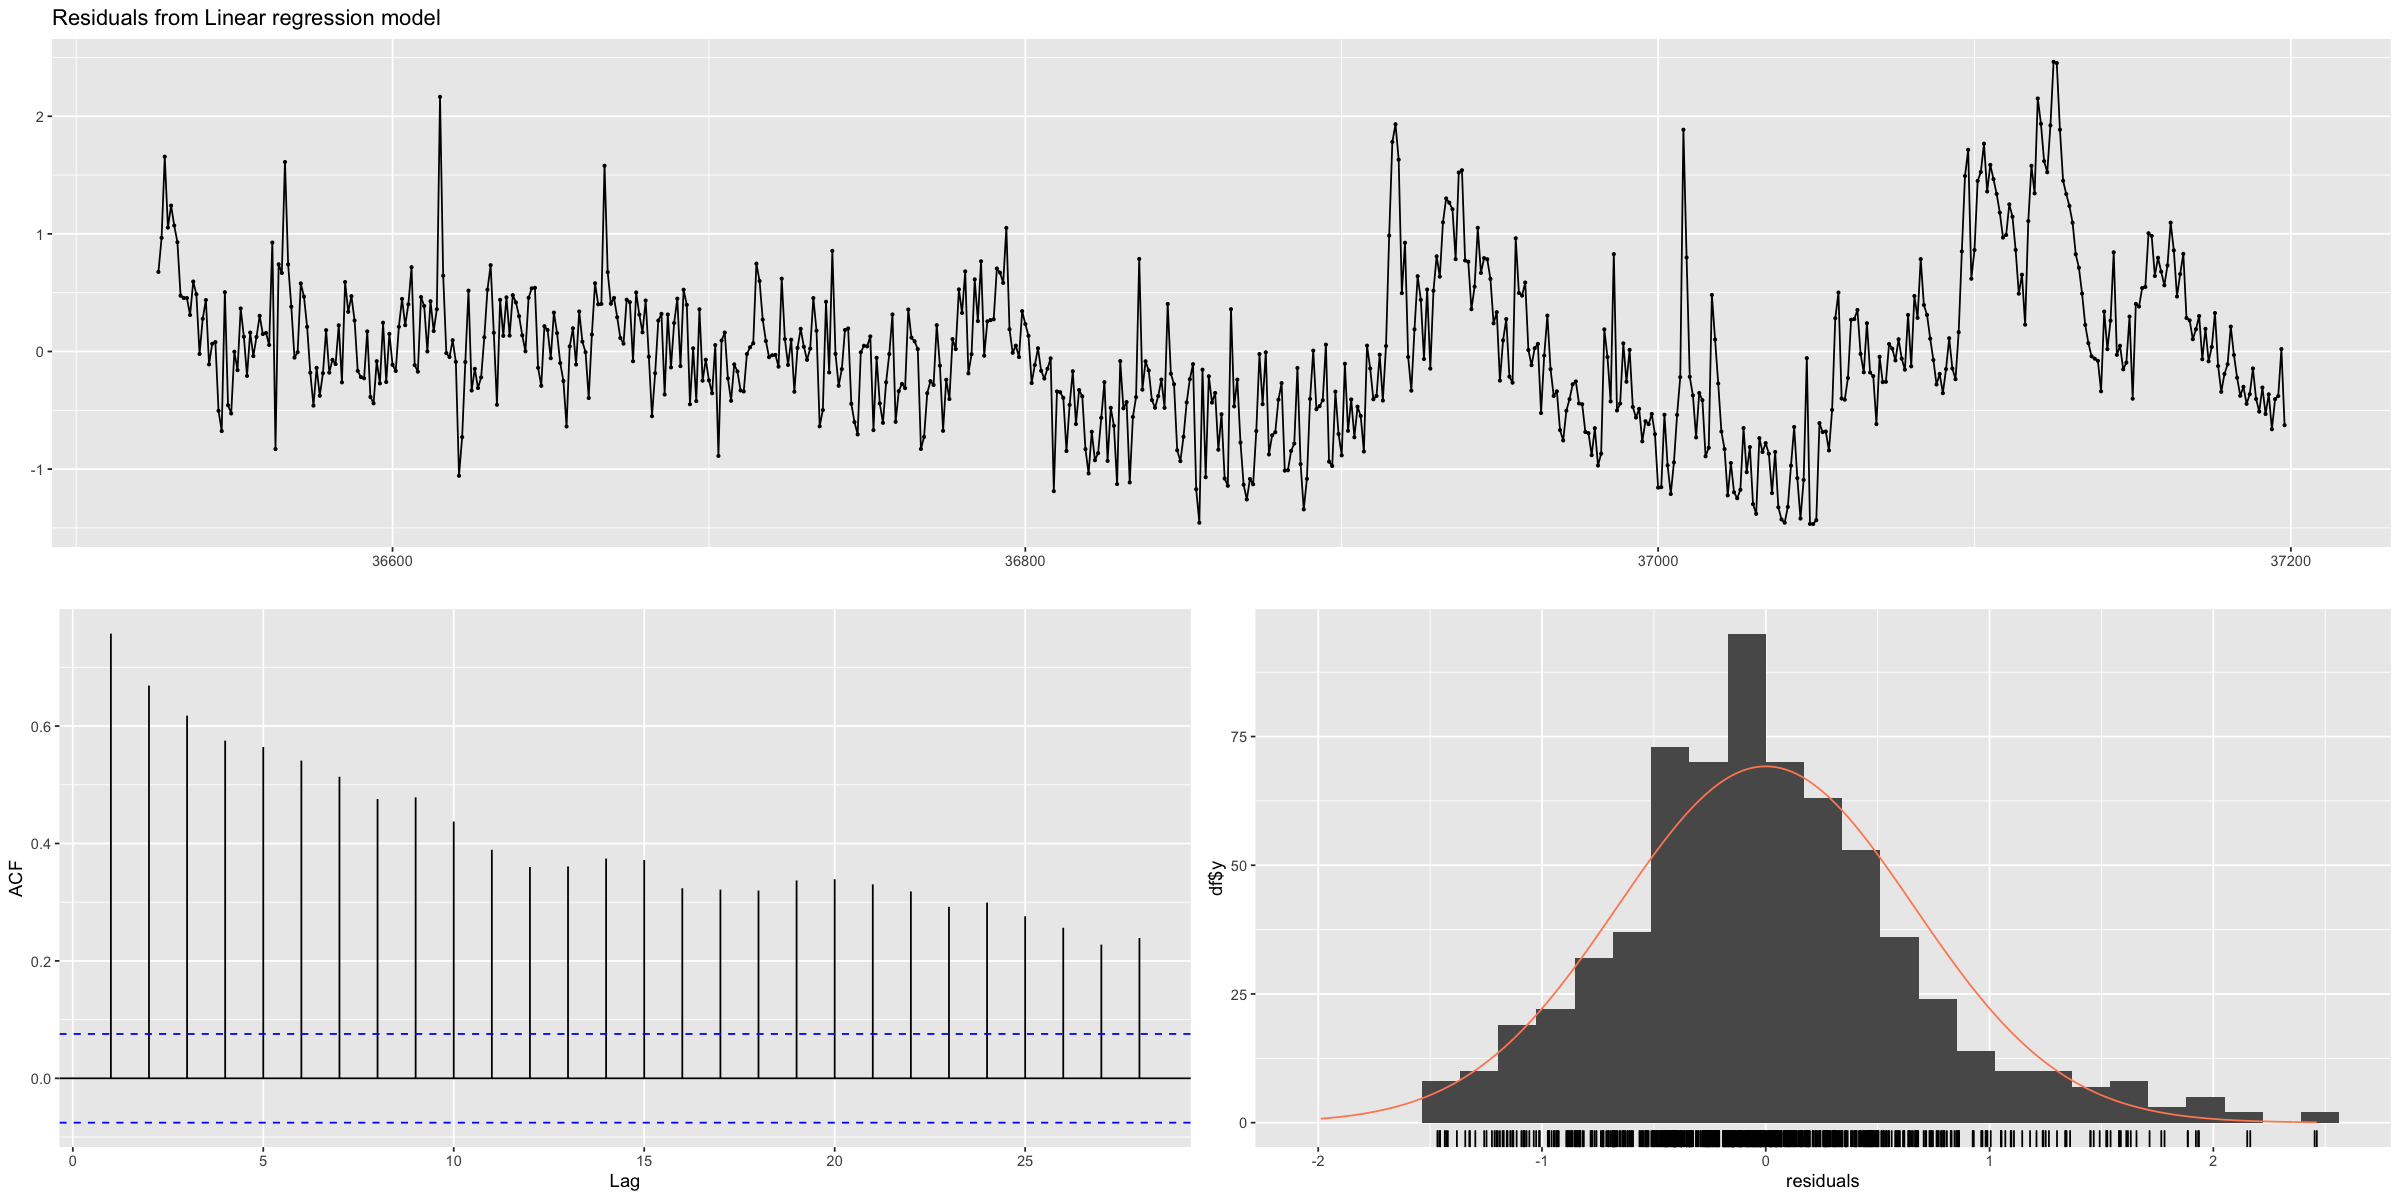

In [37]:
checkresiduals(model2, test=FALSE)

In [38]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 53.882, df = 3, p-value = 1.189e-11


In [39]:
dwtest(model2)


	Durbin-Watson test

data:  model2
DW = 0.48207, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [40]:
model3 <- tslm(formula=NFTSales_USD.ts ~ trend + NFTSales_USD_lag + Tweet_Count.ts + ETH_USD.ts, data=tsData)

In [41]:
summary(model3)


Call:
tslm(formula = NFTSales_USD.ts ~ trend + NFTSales_USD_lag + Tweet_Count.ts + 
    ETH_USD.ts, data = tsData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30803 -0.23445 -0.02114  0.22063  2.21122 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.3007693  0.2543107   1.183  0.23736    
trend            -0.0005163  0.0003961  -1.304  0.19281    
NFTSales_USD_lag  0.8054128  0.0233120  34.549  < 2e-16 ***
Tweet_Count.ts    0.1587205  0.0378257   4.196 3.08e-05 ***
ETH_USD.ts        0.1568940  0.0595548   2.634  0.00862 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3982 on 668 degrees of freedom
Multiple R-squared:  0.9747,	Adjusted R-squared:  0.9745 
F-statistic:  6423 on 4 and 668 DF,  p-value: < 2.2e-16


In [42]:
bptest(model3)


	studentized Breusch-Pagan test

data:  model3
BP = 7.6138, df = 4, p-value = 0.1068


In [43]:
dwtest(model3)


	Durbin-Watson test

data:  model3
DW = 2.4151, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0


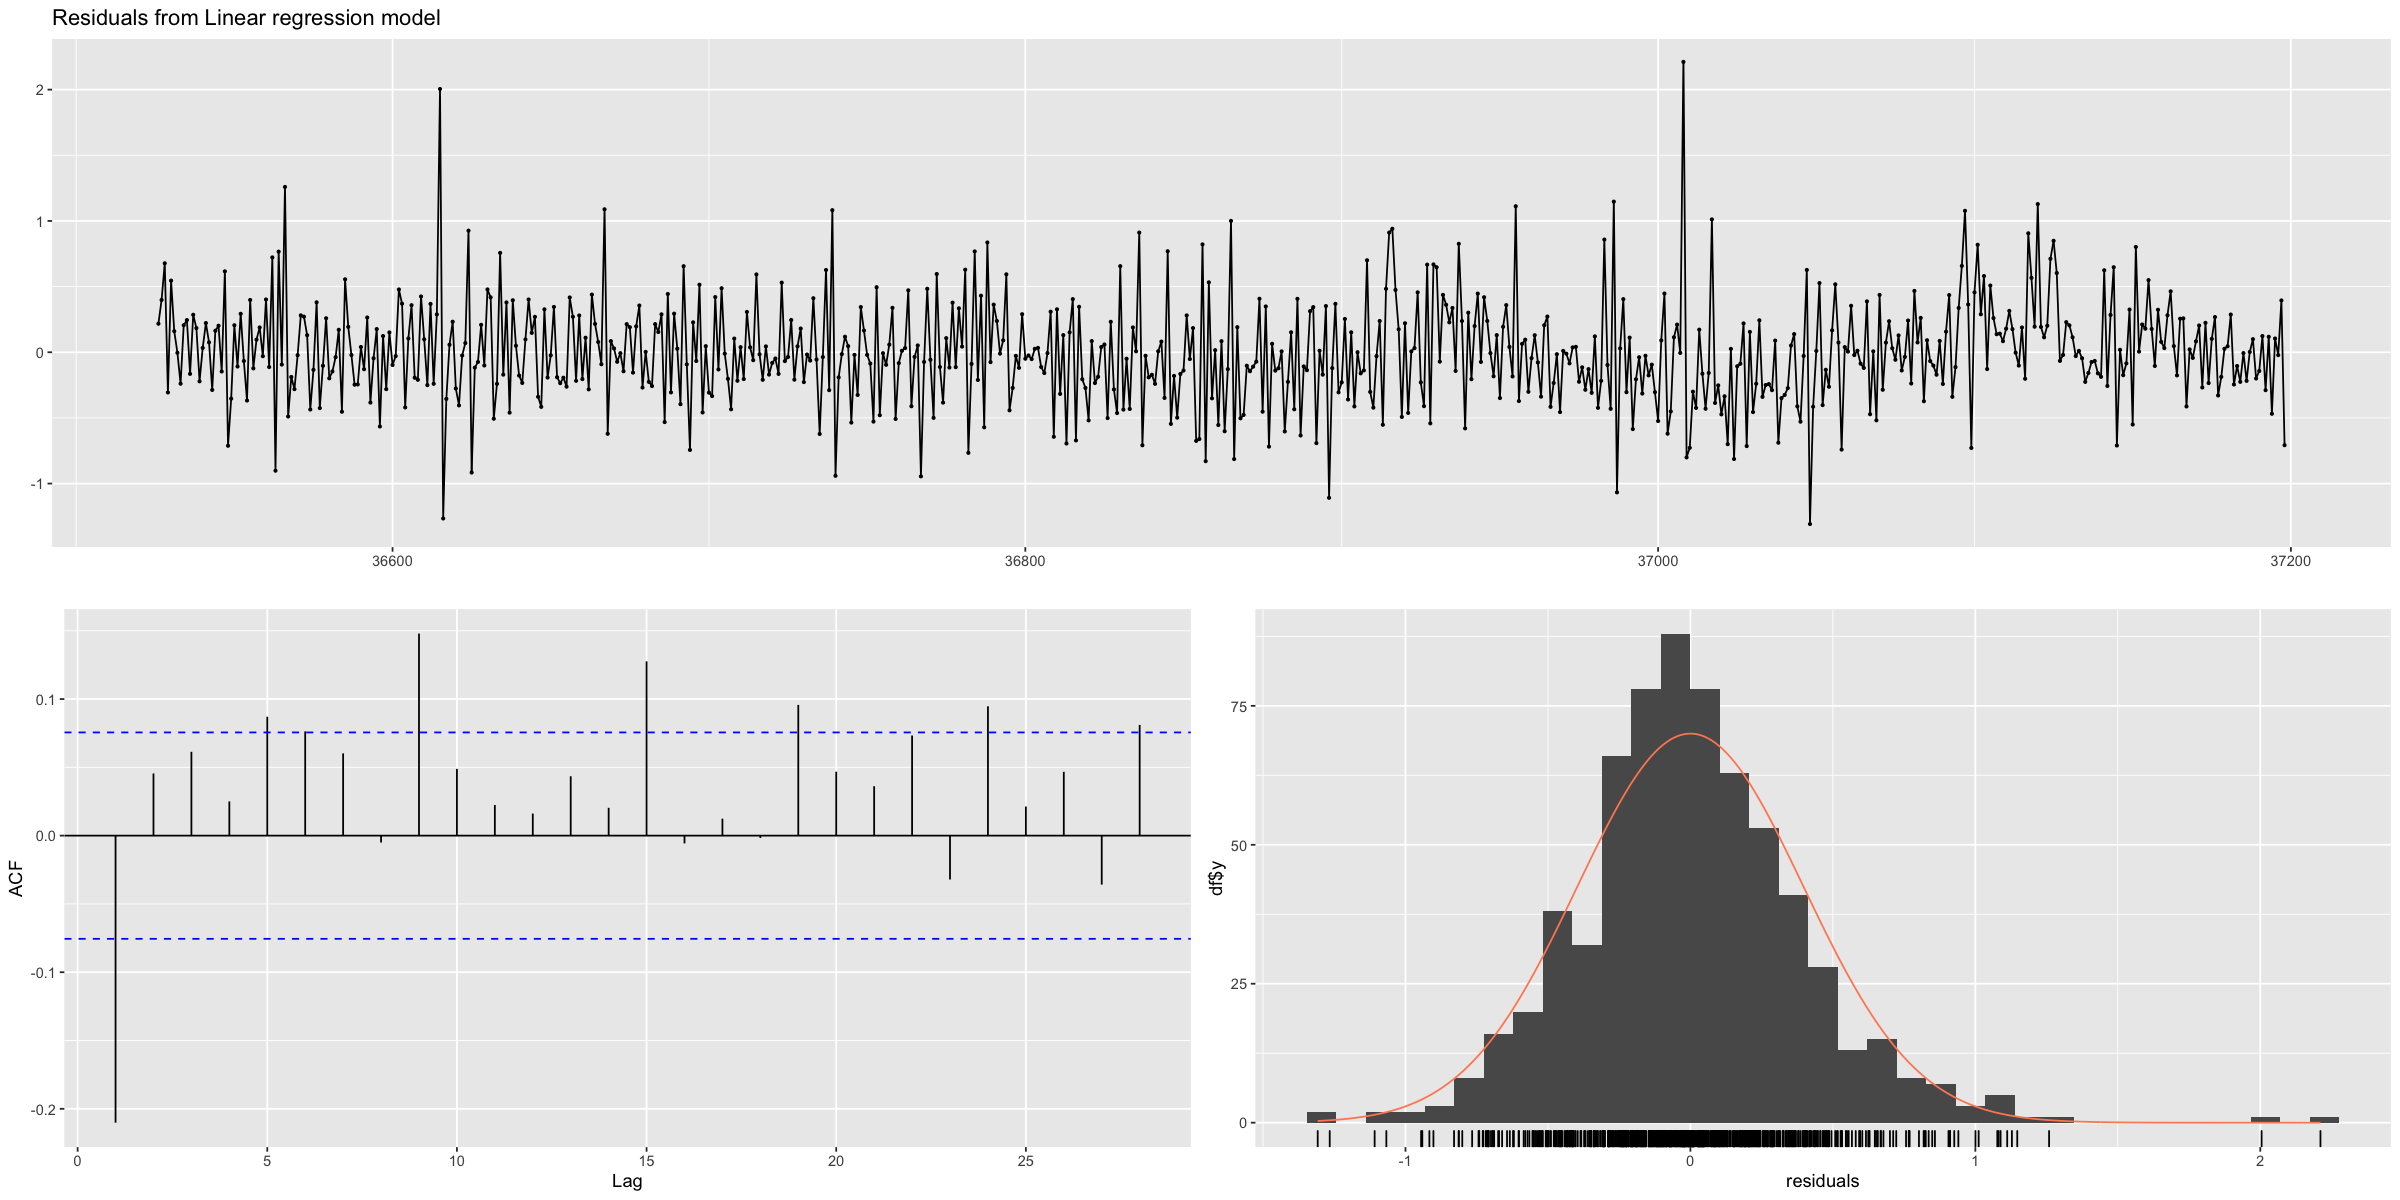

In [44]:
checkresiduals(model3, test=FALSE)

In [45]:
forecast <- predict(model3, tsData[,"NFTSales_USD.ts"])

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



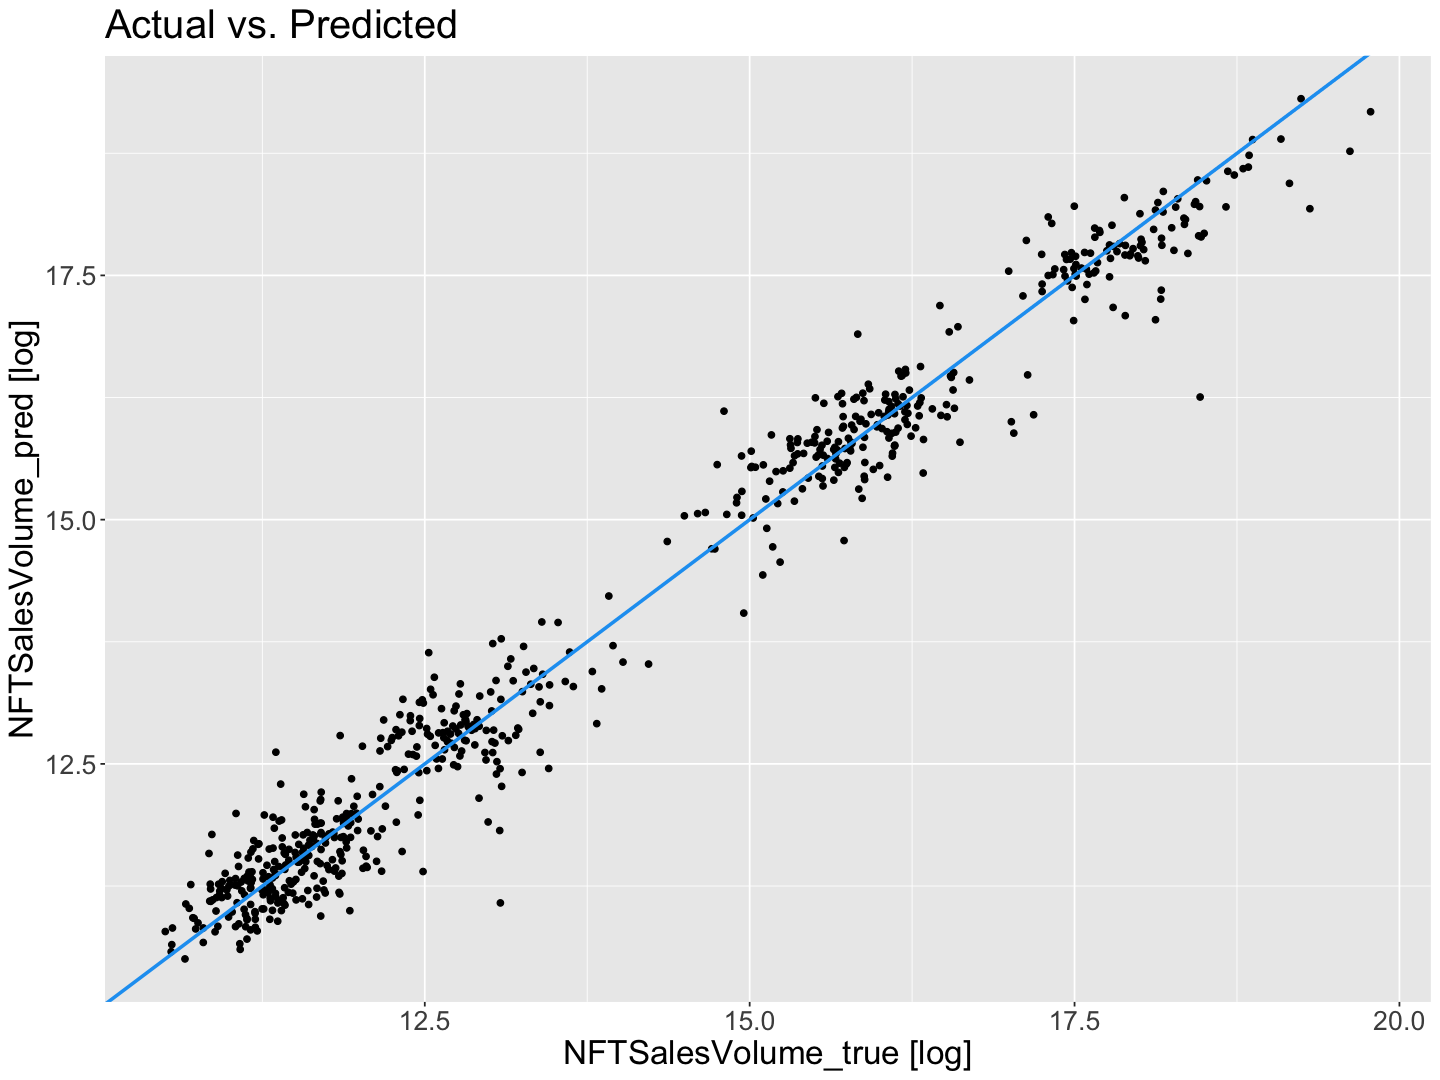

In [46]:
fig(12,9)

data.frame(y_true=tsData[,"NFTSales_USD.ts"], y_pred=forecast) %>%
ggplot() + geom_point(aes(y_true, y_pred)) + 
geom_abline(intercept = 0, slope = 1, color = "#1DA1F2", size = 1) +
labs(x="NFTSalesVolume_true [log]", y="NFTSalesVolume_pred [log]", title="Actual vs. Predicted") +
theme(text = element_text(size=20))

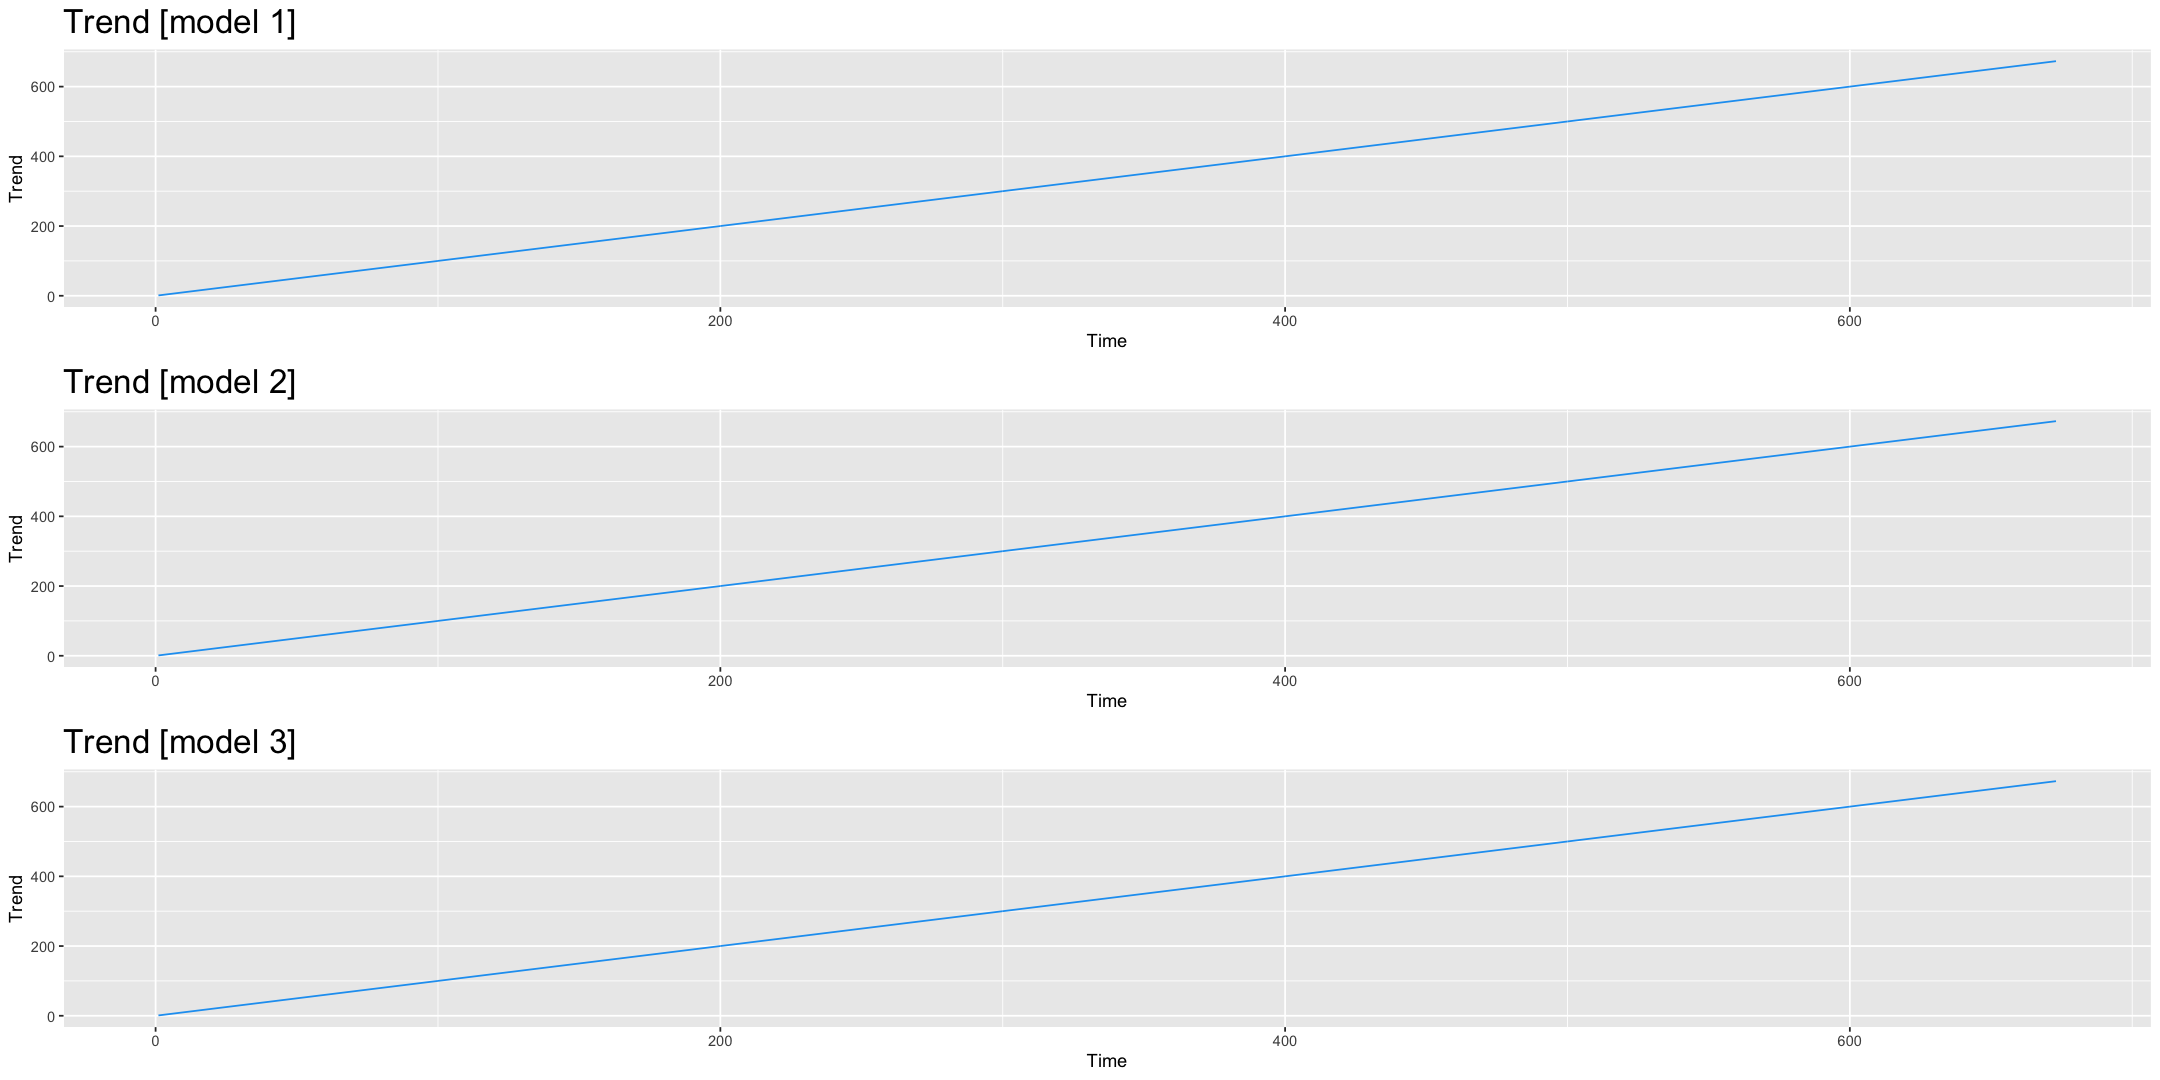

In [47]:
fig(18,9)

p1 <- autoplot(as.ts(model1$model$trend), colour='#1DA1F2') + ggtitle('Trend [model 1]') + ylab('Trend') + theme(plot.title = element_text(size = 20))
p2 <- autoplot(as.ts(model2$model$trend), colour='#1DA1F2') + ggtitle('Trend [model 2]') + ylab('Trend') + theme(plot.title = element_text(size = 20))
p3 <- autoplot(as.ts(model3$model$trend), colour='#1DA1F2') + ggtitle('Trend [model 3]') + ylab('Trend') + theme(plot.title = element_text(size = 20))

grid.arrange(p1,p2,p3, ncol=1)

## Granger Causality

In [50]:
library(vars)
library(VARtests)

In [51]:
series <- cbind(tsData[,"NFTSales_USD.ts"], tsData[,"Tweet_Count.ts"])
series1 <- cbind(tsData[,"NFTSales_USD.ts"], tsData[,"ETH_USD.ts"])

var_Selection <- VARselect(series, lag.max = 10, type = "const")
var_Selection1 <- VARselect(series, lag.max = 10, type = "const")

var_Selection$selection
#var_Selection1$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     8      6      3      8

**Comments**: Choose eight lags for the VAR model (majority wins). Now fit a VAR model as suggested by the information cireterion (ie. using eight lags)

In [52]:
model_var <- VAR(series, type = "const", lag.max = 8, ic = "SC")
model_var1 <- VAR(series1, type = "const", lag.max = 8, ic = "SC")
summary(model_var)


VAR Estimation Results:
Endogenous variables: tsData....NFTSales_USD.ts.., tsData....Tweet_Count.ts.. 
Deterministic variables: const 
Sample size: 670 
Log Likelihood: -153.883 
Roots of the characteristic polynomial:
0.9996 0.8944 0.5452 0.5452 0.3797 0.3797
Call:
VAR(y = series, type = "const", lag.max = 8, ic = "SC")


Estimation results for equation tsData....NFTSales_USD.ts..: 
tsData....NFTSales_USD.ts.. = tsData....NFTSales_USD.ts...l1 + tsData....Tweet_Count.ts...l1 + tsData....NFTSales_USD.ts...l2 + tsData....Tweet_Count.ts...l2 + tsData....NFTSales_USD.ts...l3 + tsData....Tweet_Count.ts...l3 + const 

                               Estimate Std. Error t value Pr(>|t|)    
tsData....NFTSales_USD.ts...l1  0.56685    0.03853  14.711  < 2e-16 ***
tsData....Tweet_Count.ts...l1   0.08562    0.07247   1.182  0.23780    
tsData....NFTSales_USD.ts...l2  0.19502    0.04387   4.446 1.03e-05 ***
tsData....Tweet_Count.ts...l2   0.07143    0.08908   0.802  0.42294    
tsData....NFTSales_

In [53]:
summary(model_var1)


VAR Estimation Results:
Endogenous variables: tsData....NFTSales_USD.ts.., tsData....ETH_USD.ts.. 
Deterministic variables: const 
Sample size: 671 
Log Likelihood: 686.221 
Roots of the characteristic polynomial:
0.9994 0.9261 0.2941 0.1105
Call:
VAR(y = series1, type = "const", lag.max = 8, ic = "SC")


Estimation results for equation tsData....NFTSales_USD.ts..: 
tsData....NFTSales_USD.ts.. = tsData....NFTSales_USD.ts...l1 + tsData....ETH_USD.ts...l1 + tsData....NFTSales_USD.ts...l2 + tsData....ETH_USD.ts...l2 + const 

                               Estimate Std. Error t value Pr(>|t|)    
tsData....NFTSales_USD.ts...l1  0.61350    0.03746  16.376  < 2e-16 ***
tsData....ETH_USD.ts...l1       0.57871    0.27315   2.119   0.0345 *  
tsData....NFTSales_USD.ts...l2  0.29992    0.03746   8.006 5.27e-15 ***
tsData....ETH_USD.ts...l2      -0.40056    0.27284  -1.468   0.1425    
const                           0.03281    0.08794   0.373   0.7092    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’

In [54]:
#Does Tweet count Granger-cause NFT Sales volume?
test1 <- causality(model_var, cause = "tsData....Tweet_Count.ts..")
test1$Granger


	Granger causality H0: tsData....Tweet_Count.ts.. do not Granger-cause
	tsData....NFTSales_USD.ts..

data:  VAR object model_var
F-Test = 7.9148, df1 = 3, df2 = 1326, p-value = 3.111e-05


In [55]:
#Does NFT Sales volume Granger-cause Tweet count?
test2 <- causality(model_var, cause = "tsData....NFTSales_USD.ts..")
test2$Granger


	Granger causality H0: tsData....NFTSales_USD.ts.. do not Granger-cause
	tsData....Tweet_Count.ts..

data:  VAR object model_var
F-Test = 5.0235, df1 = 3, df2 = 1326, p-value = 0.001824


In [56]:
#Does ETH prices Granger-cause NFT Sales volume?
test3 <- causality(model_var1, cause = "tsData....ETH_USD.ts..")
test3$Granger


	Granger causality H0: tsData....ETH_USD.ts.. do not Granger-cause
	tsData....NFTSales_USD.ts..

data:  VAR object model_var1
F-Test = 11.135, df1 = 2, df2 = 1332, p-value = 1.6e-05


In [57]:
#Does NFT Sales volume Granger-cause ETH prices?
test4 <- causality(model_var1, cause = "tsData....NFTSales_USD.ts..")
test4$Granger


	Granger causality H0: tsData....NFTSales_USD.ts.. do not Granger-cause
	tsData....ETH_USD.ts..

data:  VAR object model_var1
F-Test = 3.5762, df1 = 2, df2 = 1332, p-value = 0.02825
